In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy import stats
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

In [2]:
#Mrk421 data from feb to may (OLD) with new specifications.
# E above 1TeV
Data1 = uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/Eg1TeV_latest.root")
# E below 1TeV
Data2 = uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/El1TeV_latest.root")

#Mrk421 NEW data Feb'24 to June'24
#E above 1TeV
new_D1=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/Eg1TeV_NEW.root")
#E below 1TeV
new_D2=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/El1TeV_NEW.root")

##lightcurve import
lightC1 = Data1['LightCurve;1']
lightC2 = Data2['LightCurve;1']
LC1=new_D1['LightCurve;1']
LC2=new_D2['LightCurve;1']
########
lcX = LC2.all_members['fX']
lcY = LC2.all_members['fY']
lcEX = LC2.all_members['fEX']
lcEY = LC2.all_members['fEY']
LCX = LC1.all_members['fX']
LCY = LC1.all_members['fY']
LCEX = LC1.all_members['fEX']
LCEY = LC1.all_members['fEY']

#data import
# E above 1TeV
MJD_X = lightC1.all_members['fX']
flux_Y = lightC1.all_members['fY']
MJD_EX = lightC1.all_members['fEX']
flux_EY = lightC1.all_members['fEY']
# E below 1TeV
MJD_x = lightC2.all_members['fX']
flux_y = lightC2.all_members['fY']
MJD_ex = lightC2.all_members['fEX']
flux_ey = lightC2.all_members['fEY']

#for E<1TeV with new specifications
final_mjd=np.concatenate((MJD_x, lcX))
final_Emjd=np.concatenate((MJD_ex, lcEX))
final_flux=np.concatenate((flux_y, lcY))
final_Eflux=np.concatenate((flux_ey, lcEY))
#E>1TeV
finalmjd=np.concatenate((MJD_X, LCX))
finalEmjd=np.concatenate((MJD_EX, LCEX))
finalflux=np.concatenate((flux_Y, LCY))
finalEflux=np.concatenate((flux_EY, LCEY))

iindex = np.array([11, 15])
final_mjd1 = np.delete(final_mjd, iindex)
finalmjd1 = np.delete(finalmjd, iindex)
final_flux1 = np.delete(final_flux, iindex)
finalflux1 = np.delete(finalflux, iindex)
final_Eflux1 = np.delete(final_Eflux, iindex)
final_Emjd1 = np.delete(final_Emjd, iindex)
finalEflux1 = np.delete(finalEflux, iindex)
finalEmjd1 = np.delete(finalEmjd, iindex)

In [3]:
base_dir = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/IXPE/IXPE_fold/variable_beta//"

file_ids = ["0430", "0501", "0502", "0503", "0504", "0505", "0506", "0510", "0511", "0512", "0513"]

fold_files = {}

alpha = [] 
beta = [] 

# Loop through file IDs and open each file
for file_id in file_ids:
    file_path = os.path.join(base_dir, f"fold_{file_id}.root")

    fold_files[f"fold_{file_id}"] = uproot.open(file_path)
        
    fit_params = fold_files[f"fold_{file_id}"]["FitParameters;1"]
    fit_values = fit_params.member("fElements")
    
    alpha.append(fit_values[1])
    beta.append(fit_values[2])

In [4]:
xray_els2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_03to2keVflux.dat",delimiter=' ', skiprows=2)
xray_egs2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_2to10keVflux.dat",delimiter=' ', skiprows=2)

xrt_mjd_ls2kev = xray_els2kev['MJD'].values
xrt_f_ls2kev = xray_els2kev['midlog_flux'].values
xrt_eflow_ls2kev = xray_els2kev['lowlog_flux'].values
xrt_efhigh_ls2kev = xray_els2kev['highlog_flux'].values
######################
xrt_eflow_ls = 10**(xrt_f_ls2kev) - 10**(xrt_eflow_ls2kev)
xrt_efhigh_ls = 10**(xrt_efhigh_ls2kev) - 10**(xrt_f_ls2kev)
############################################################
xrt_mjd_gs2kev = xray_egs2kev['MJD'].values
xrt_f_gs2kev = xray_egs2kev['midlog_flux'].values
xrt_eflow_gs2kev = xray_egs2kev['lowlog_flux'].values
xrt_efhigh_gs2kev = xray_egs2kev['highlog_flux'].values
######################
xrt_eflow_gs = 10**(xrt_f_gs2kev) - 10**(xrt_eflow_gs2kev)
xrt_efhigh_gs = 10**(xrt_efhigh_gs2kev) - 10**(xrt_f_gs2kev)
############################################################
xrt_alpha_ls2kev = xray_els2kev['midalpha'].values
xrt_lowalpha_ls2kev = xray_els2kev['lowalpha'].values
xrt_highalpha_ls2kev = xray_els2kev['highalpha'].values
xrt_lowalpha_ls2kev_err = xrt_alpha_ls2kev - xrt_lowalpha_ls2kev
xrt_highalpha_ls2kev_err = xrt_highalpha_ls2kev - xrt_alpha_ls2kev
#####
xrt_alpha_gs2kev = xray_egs2kev['midalpha'].values
xrt_lowalpha_gs2kev = xray_egs2kev['lowalpha'].values
xrt_highalpha_gs2kev = xray_egs2kev['highalpha'].values
xrt_lowalpha_gs2kev_err = xrt_alpha_gs2kev - xrt_lowalpha_gs2kev
xrt_highalpha_gs2kev_err = xrt_highalpha_gs2kev - xrt_alpha_gs2kev
#############################################################
xrt_beta_ls2kev = xray_els2kev['midbeta'].values
xrt_lowbeta_ls2kev = xray_els2kev['lowbeta'].values
xrt_highbeta_ls2kev = xray_els2kev['highbeta'].values
xrt_lowbeta_ls2kev_err = xrt_beta_ls2kev - xrt_lowbeta_ls2kev
xrt_highbeta_ls2kev_err = xrt_highbeta_ls2kev - xrt_beta_ls2kev

mean_xrt_beta_ls2kev = np.mean(xrt_beta_ls2kev)
mean_xrt_lowbeta_ls2kev = np.mean(xrt_lowbeta_ls2kev)
mean_xrt_highbeta_ls2kev = np.mean(xrt_highbeta_ls2kev)
#####
xrt_beta_gs2kev = xray_egs2kev['midbeta'].values
xrt_lowbeta_gs2kev = xray_egs2kev['lowbeta'].values
xrt_highbeta_gs2kev = xray_egs2kev['highbeta'].values
xrt_lowbeta_gs2kev_err = xrt_beta_gs2kev - xrt_lowbeta_gs2kev
xrt_highbeta_gs2kev_err = xrt_highbeta_gs2kev - xrt_beta_gs2kev

mean_xrt_beta_gs2kev = np.mean(xrt_beta_gs2kev)
mean_xrt_lowbeta_gs2kev = np.mean(xrt_lowbeta_gs2kev)
mean_xrt_highbeta_gs2kev = np.mean(xrt_highbeta_gs2kev)

In [31]:
base_direct = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/IXPE/IXPE_fold/fixed_beta/"

files_id = ["0430b", "0501b", "0502b", "0504b", "0505b", "0506b", "0510b", "0511b", "0512b", "0513b"]

foldb_files = {}

Alpha_b = []  

# Loop through file IDs and open each file
for file in files_id:
    file_path = os.path.join(base_direct, f"fold_{file}.root")

    if os.path.exists(file_path):
        foldb_files[f"fold_{file}"] = uproot.open(file_path)
        
        fit_params = foldb_files[f"fold_{file}"]["FitParameters;1"]
        fit_values = fit_params.member("fElements")
    
        Alpha_b.append(fit_values[1])

In [6]:
MJD_mod=np.array([60429.92016886, 60430.95138023, 60433.99252742, 60434.90061434, 60435.92343486, 60440.01963832, 60440.96556404, 60441.99787484, 60443.01454012])

In [8]:
MJD=np.array([60429.92016886, 60430.95138023, 60431.90237578, 60433.99252742, 60434.90061434, 60435.92343486, 60440.01963832, 60440.96556404, 60441.99787484, 60443.01454012])

In [21]:
MJD_ref = MJD[0]
MJD_shifted = MJD - MJD_ref
def lin_func(x, m ,c):
    return m*x+c
xrt_mjd_ls2kev_shifted = xrt_mjd_ls2kev - xrt_mjd_ls2kev[0]
param, pcov = curve_fit(lin_func, MJD_shifted, beta_modified, sigma= beta_err_modified, absolute_sigma=True)
m, c = param
model = lin_func(MJD_shifted, m, c)
#print(*param_xrt)
mjd_xrt_ref = np.min(xrt_mjd_ls2kev)
mjd_shifted = xrt_mjd_ls2kev-mjd_xrt_ref
param_xrt, pcov_xrt = curve_fit(lin_func, xrt_mjd_ls2kev_shifted, xrt_beta_ls2kev, sigma= xrt_highbeta_ls2kev_err, absolute_sigma=True)
param_xrt_alpha, pcov_xrt_alpha = curve_fit(lin_func, xrt_mjd_ls2kev_shifted, xrt_alpha_ls2kev, sigma= xrt_highalpha_ls2kev_err, absolute_sigma=True)
model_xrt=lin_func(xrt_mjd_ls2kev, *param_xrt)
model_xrt_alpha = lin_func(xrt_mjd_ls2kev, *param_xrt_alpha)

In [13]:

alpha_err = [] 
beta_err = [] 
for file_id in file_ids:
    file_path = os.path.join(base_dir, f"fold_{file_id}.root")

    if os.path.exists(file_path):
        fold_files[f"fold_{file_id}"] = uproot.open(file_path)
        
        fit_params_err = fold_files[f"fold_{file_id}"]["MIGRAD_FitParameters_errors;1"]
        fit_values_err = fit_params_err.member("fElements")
    
        alpha_err.append(fit_values_err[1])
        beta_err.append(fit_values_err[2])

print(alpha_err)

[0.21498257, 0.1458962, 1.1230503, 0.5634501, 0.06350682, 0.17068471, 0.1039589, 0.083755754, 0.11653076, 0.13605726, 0.11445923]


In [35]:
Alpha_b_err = [] 
for file in files_id:
    file_path = os.path.join(base_direct, f"fold_{file}.root")

    if os.path.exists(file_path):
        fold_files[f"fold_{file}"] = uproot.open(file_path)
        
        fit_params_err = fold_files[f"fold_{file}"]["MIGRAD_FitParameters_errors;1"]
        fit_values_err = fit_params_err.member("fElements")
    
        Alpha_b_err.append(fit_values_err[1])

In [23]:
param_xrt_ms2KeV, pcov_xrt_ms2KeV = curve_fit(lin_func, xrt_mjd_ls2kev_shifted, xrt_beta_gs2kev, sigma= xrt_highbeta_gs2kev_err, absolute_sigma=True)
print(*param_xrt_ms2KeV)

-0.00047491495673925233 0.26387857101813367


## spectral index and curvature parameter of VHE data obtained from fold

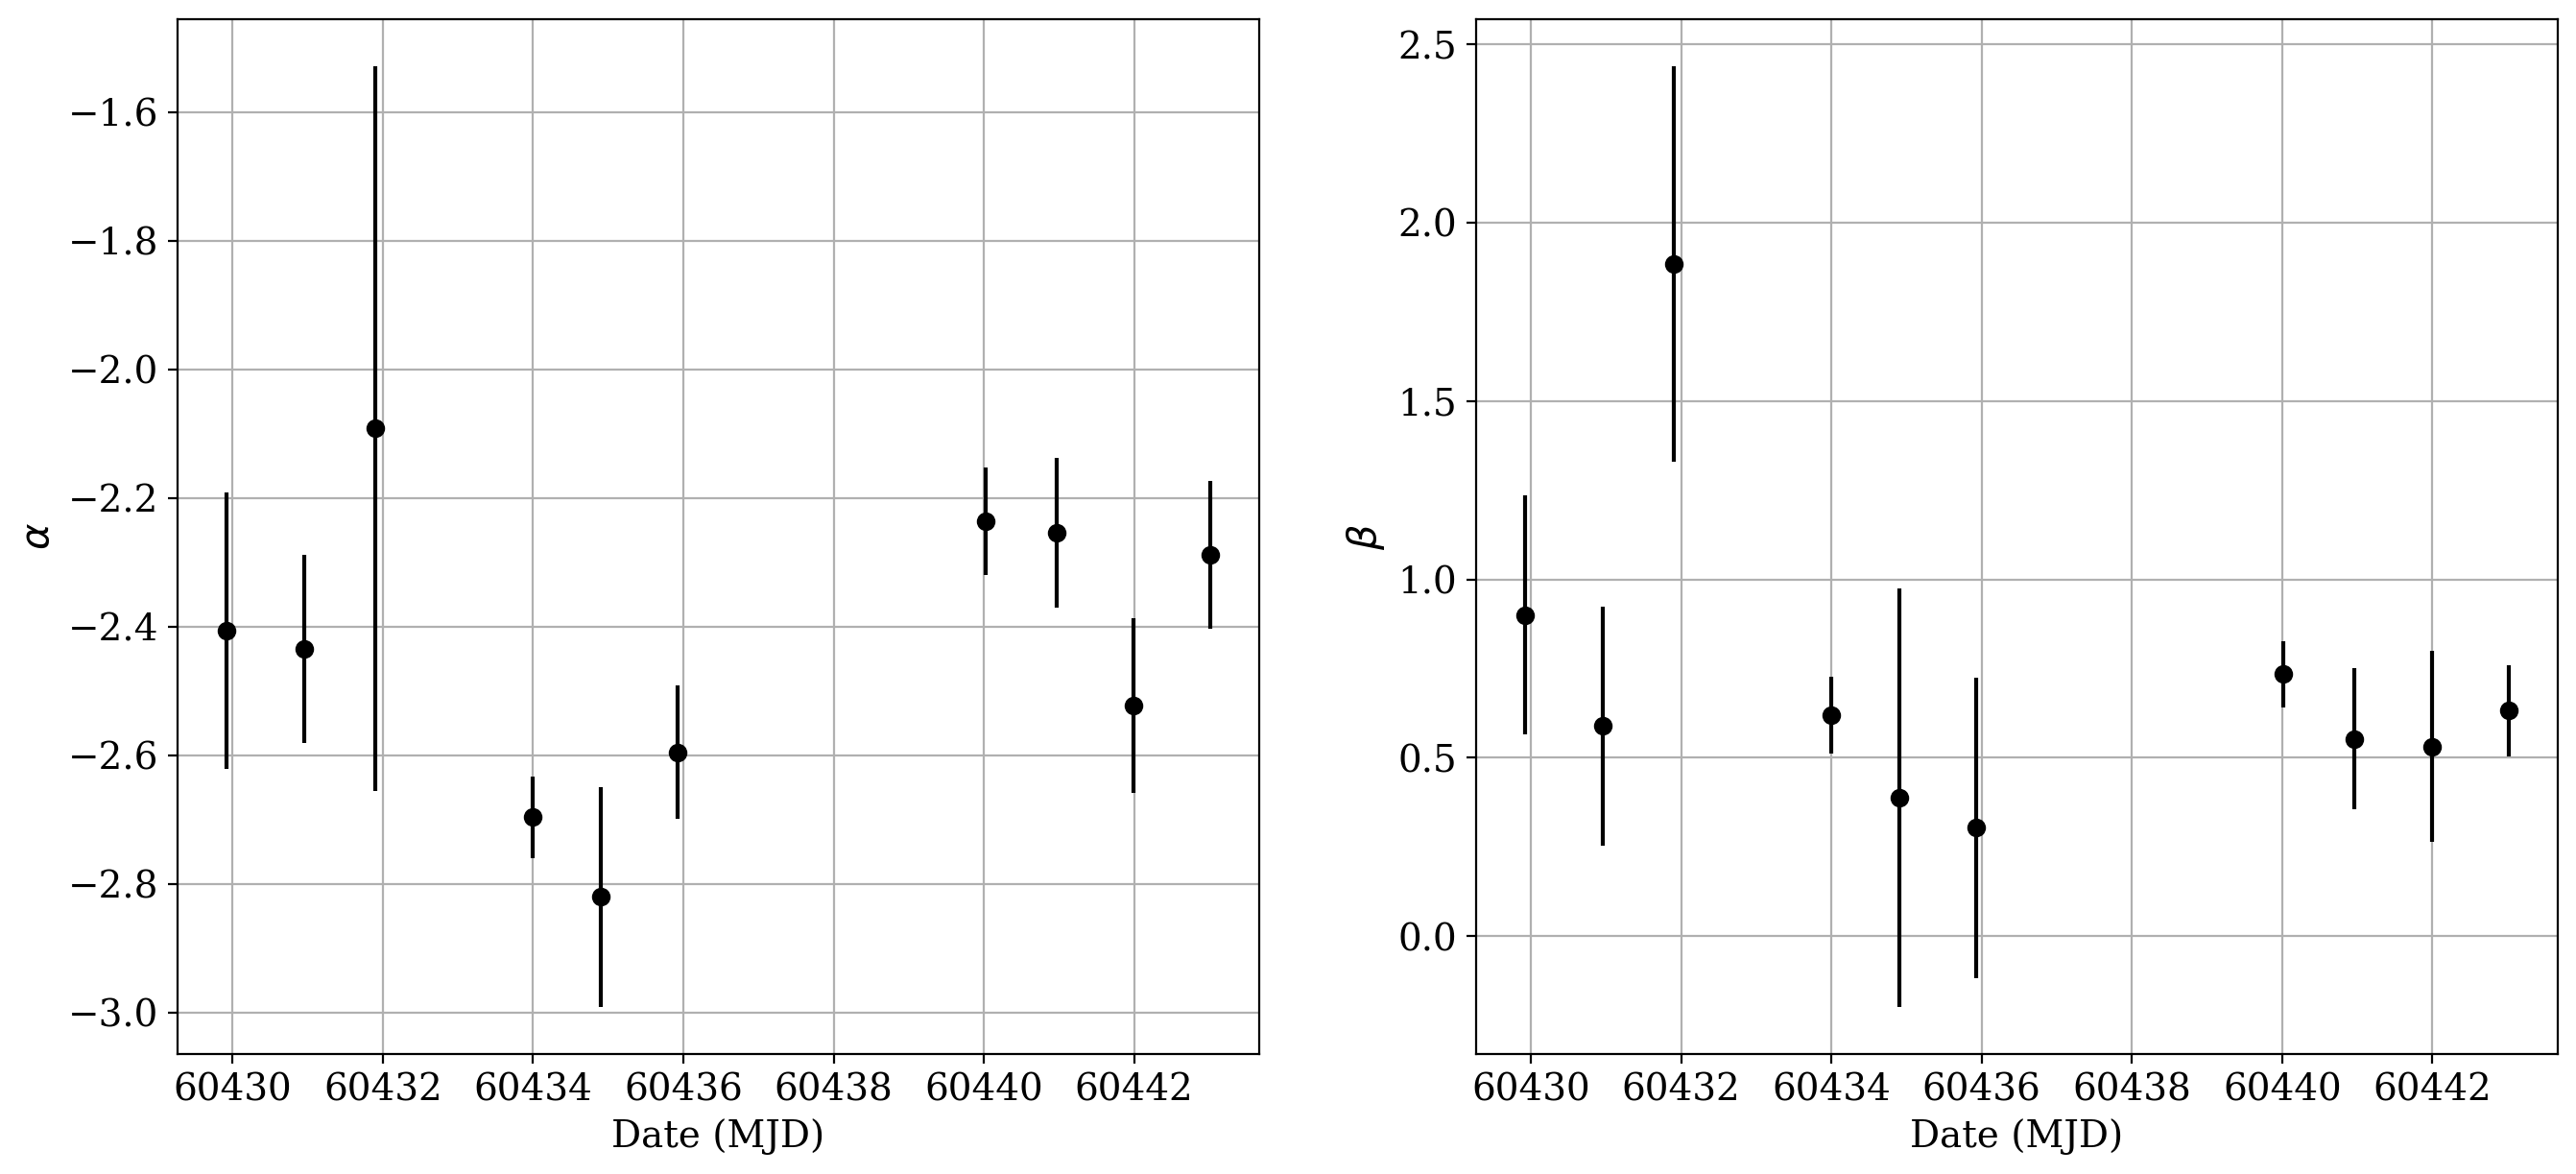

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16,7))
axs[0].errorbar(MJD, alpha_mod, yerr = alpha_err_mod, color= 'black', fmt='o')
axs[0].set_xlabel(r'Date (MJD)')
axs[0].set_ylabel(r'$\alpha$', fontsize=15)
axs[0].grid(True)
axs[1].errorbar(MJD, beta_modified, yerr=beta_err_modified, color = 'black', fmt='o')
axs[1].set_ylabel(r'$\beta$', fontsize=15)
axs[1].set_xlabel(r'Date (MJD)')
axs[1].grid(True)
plt.savefig('alpha_beta.png')

In [37]:
print(MJD_shifted, MJD)
param_VHE, pcov_VHE = curve_fit(lin_func, MJD_shifted, Alpha_b, sigma= Alpha_b_err, absolute_sigma=True)
m_VHE, c_VHE = param_VHE
model_VHE = lin_func(MJD_shifted, m_VHE, c_VHE)
print(alpha, alpha_err)

[ 0.          1.03121137  1.98220692  4.07235856  4.98044548  6.003266
 10.09946946 11.04539518 12.07770598 13.09437126] [60429.92016886 60430.95138023 60431.90237578 60433.99252742
 60434.90061434 60435.92343486 60440.01963832 60440.96556404
 60441.99787484 60443.01454012]
[-2.405759, -2.4346485, -3.5539072, -2.091631, -2.6963758, -2.8198419, -2.5951946, -2.236231, -2.2538688, -2.5230625, -2.2886932] [0.21498257, 0.1458962, 1.1230503, 0.5634501, 0.06350682, 0.17068471, 0.1039589, 0.083755754, 0.11653076, 0.13605726, 0.11445923]


### Spectral index when curvature parameter is free (left) and fixed (right)

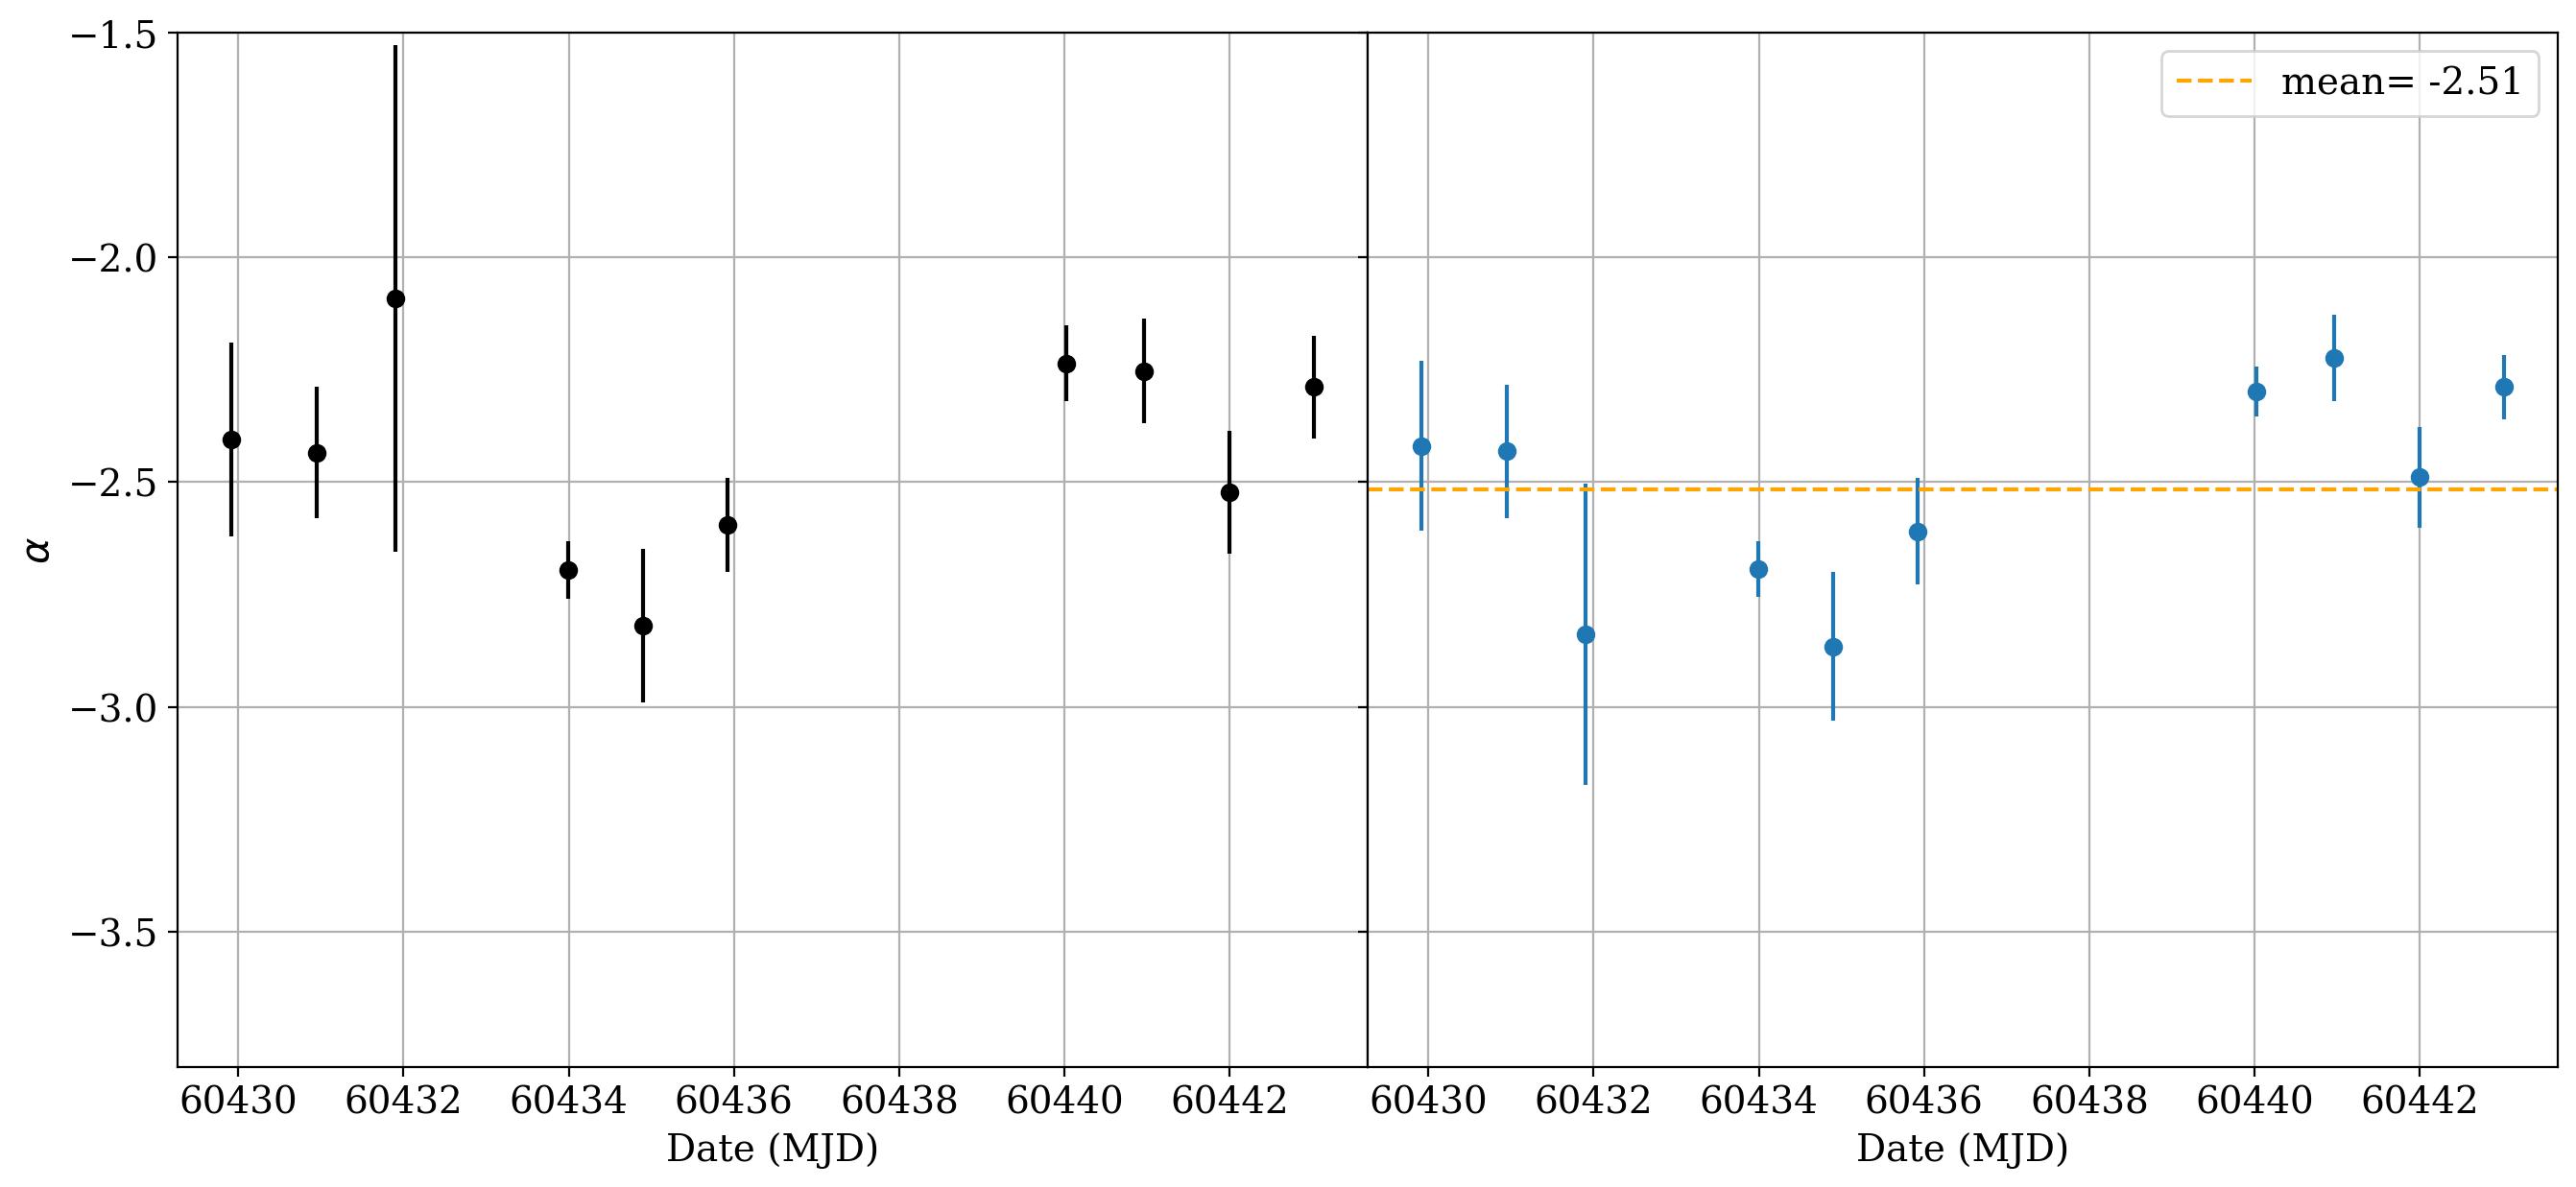

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(16,7), sharey=True)
fig.subplots_adjust(wspace=0.0)
axs[0].errorbar(MJD, alpha_mod, yerr = alpha_err_mod, color= 'black', fmt='o')
#axs[0].set_title(r'$\alpha$ with variable $\beta$')
axs[0].set_xlabel(r'Date (MJD)')
axs[0].set_ylabel(r'$\alpha$', fontsize=15)
axs[0].set_ylim(-3.8, -1.5)
axs[0].grid(True)
#plt.show()
axs[1].errorbar(MJD, Alpha_b, yerr = Alpha_b_err, fmt = 'o')
axs[1].axhline(y = np.mean(Alpha_b), color='orange', linestyle='--', label='mean= -2.51')
#axs[1].plot(MJD, model_VHE, color='orange', lw = 2.5, label = 'linear fit')
#axs[1].annotate(r'$\beta = 0.631534$', (60440.3, -1.9), color='r', fontsize=15)
#axs[1].set_title(r'$\alpha$ with fixed $\beta$')
axs[1].set_xlabel(r'Date (MJD)')
#axs[1].set_ylabel(r'\alpha')
axs[1].set_ylim(-3.8, -1.5)
axs[1].legend()
axs[1].grid(True)
plt.savefig('alpha_variation_vs_MJD_MAGIC.png')

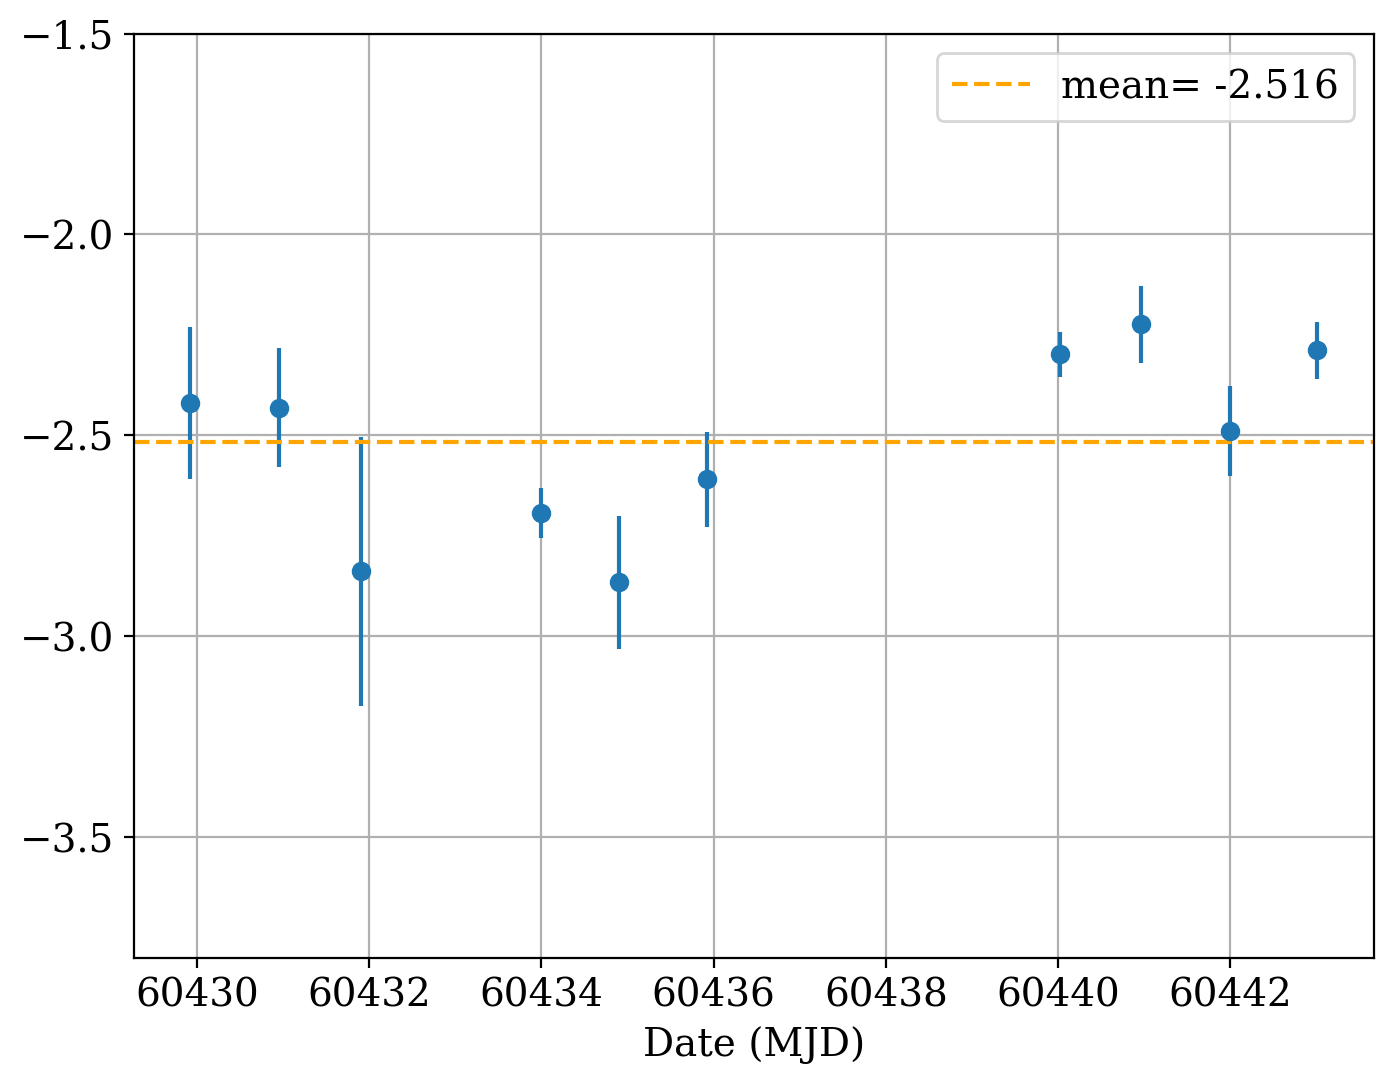

In [47]:
plt.figure(figsize=(8,6))
#fig, axs = plt.subplots(1, 2, figsize=(16,7), sharey=True)
plt.errorbar(MJD, Alpha_b, yerr = Alpha_b_err, fmt = 'o')
plt.axhline(y = np.mean(Alpha_b), color='orange', linestyle='--', label='mean= -2.516')
#axs[1].plot(MJD, model_VHE, color='orange', lw = 2.5, label = 'linear fit')
#axs[1].annotate(r'$\beta = 0.631534$', (60440.3, -1.9), color='r', fontsize=15)
#axs[1].set_title(r'$\alpha$ with fixed $\beta$')
plt.xlabel(r'Date (MJD)')
#axs[1].set_ylabel(r'\alpha')
plt.ylim(-3.8, -1.5)
plt.legend()
plt.grid(True)
plt.savefig('alpha_variation_vs_MJD_MAGIC_revised.png')

In [45]:
Alpha_b = np.array(Alpha_b)
Alpha_b_err = np.array(Alpha_b_err)
chisq_alpha_b = np.sum((Alpha_b - np.mean(Alpha_b))**2/Alpha_b_err**2)
dof_alpha_b = len(Alpha_b) - 1
p1_alpha_b = 1 - stats.chi2.cdf(chisq_alpha_b, dof_alpha_b)

from scipy.stats import norm

def p_to_sigma(p):
    return norm.ppf(p)

SSigma = p_to_sigma(p1_alpha_b)

print(f"Significance level: {SSigma:.3f}σ")
print(p1_alpha_b)

Significance level: -5.167σ
1.1896141394185378e-07


In [49]:
base_direc = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/IXPE/IXPE_flute1/"
base_directory = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/IXPE/IXPE_flute2/"
file_ids = ["0430", "0501", "0502", "0503", "0504", "0505", "0506", "0510", "0511", "0512", "0513"]
flute1_files = {}

for file in file_ids:
    file_path = os.path.join(base_direc, f"flute1_{file}.root")

    if os.path.exists(file_path):
        flute1_files[f"flute1_{file}"] = uproot.open(file_path)


In [51]:
flute2_files = {}

for file in file_ids:
    file_path = os.path.join(base_directory, f"flute2_{file}.root")

    if os.path.exists(file_path):
        flute2_files[f"flute2_{file}"] = uproot.open(file_path)

In [53]:
LC1_0430 = flute1_files['flute1_0430']["LightCurve;1"]
LC1_0501 = flute1_files['flute1_0501']["LightCurve;1"]
LC1_0502 = flute1_files['flute1_0502']["LightCurve;1"]
LC1_0503 = flute1_files['flute1_0503']["LightCurve;1"]
LC1_0504 = flute1_files['flute1_0504']["LightCurve;1"]
LC1_0505 = flute1_files['flute1_0505']["LightCurve;1"]
LC1_0506 = flute1_files['flute1_0506']["LightCurve;1"]
LC1_0510 = flute1_files['flute1_0510']["LightCurve;1"]
LC1_0511 = flute1_files['flute1_0511']["LightCurve;1"]
LC1_0512 = flute1_files['flute1_0512']["LightCurve;1"]
LC1_0513 = flute1_files['flute1_0513']["LightCurve;1"]
########
LC2_0430 = flute2_files['flute2_0430']["LightCurve;1"]
LC2_0501 = flute2_files['flute2_0501']["LightCurve;1"]
LC2_0502 = flute2_files['flute2_0502']["LightCurve;1"]
LC2_0503 = flute2_files['flute2_0503']["LightCurve;1"]
LC2_0504 = flute2_files['flute2_0504']["LightCurve;1"]
LC2_0505 = flute2_files['flute2_0505']["LightCurve;1"]
LC2_0506 = flute2_files['flute2_0506']["LightCurve;1"]
LC2_0510 = flute2_files['flute2_0510']["LightCurve;1"]
LC2_0511 = flute2_files['flute2_0511']["LightCurve;1"]
LC2_0512 = flute2_files['flute2_0512']["LightCurve;1"]
LC2_0513 = flute2_files['flute2_0513']["LightCurve;1"]

In [55]:
flux1_0430 = LC1_0430.all_members["fY"]
flux1_err_0430 = LC1_0430.all_members["fEY"]
flux1_0501 = LC1_0501.all_members["fY"]
flux1_err_0501 = LC1_0501.all_members["fEY"]
flux1_0502 = LC1_0502.all_members["fY"]
flux1_err_0502 = LC1_0502.all_members["fEY"]
flux1_0503 = LC1_0503.all_members["fY"]
flux1_err_0503 = LC1_0503.all_members["fEY"]
flux1_0504 = LC1_0504.all_members["fY"]
flux1_err_0504 = LC1_0504.all_members["fEY"]
flux1_0505 = LC1_0505.all_members["fY"]
flux1_err_0505 = LC1_0505.all_members["fEY"]
flux1_0506 = LC1_0506.all_members["fY"]
flux1_err_0506 = LC1_0506.all_members["fEY"]
flux1_0510 = LC1_0510.all_members["fY"]
flux1_err_0510 = LC1_0510.all_members["fEY"]
flux1_0511 = LC1_0511.all_members["fY"]
flux1_err_0511 = LC1_0511.all_members["fEY"]
flux1_0512 = LC1_0512.all_members["fY"]
flux1_err_0512 = LC1_0512.all_members["fEY"]
flux1_0513 = LC1_0513.all_members["fY"]
flux1_err_0513 = LC1_0513.all_members["fEY"]
#########################################
flux2_0430 = LC2_0430.all_members["fY"]
flux2_err_0430 = LC2_0430.all_members["fEY"]
flux2_0501 = LC2_0501.all_members["fY"]
flux2_err_0501 = LC2_0501.all_members["fEY"]
flux2_0502 = LC2_0502.all_members["fY"]
flux2_err_0502 = LC2_0502.all_members["fEY"]
flux2_0503 = LC2_0503.all_members["fY"]
flux2_err_0503 = LC2_0503.all_members["fEY"]
flux2_0504 = LC2_0504.all_members["fY"]
flux2_err_0504 = LC2_0504.all_members["fEY"]
flux2_0505 = LC2_0505.all_members["fY"]
flux2_err_0505 = LC2_0505.all_members["fEY"]
flux2_0506 = LC2_0506.all_members["fY"]
flux2_err_0506 = LC2_0506.all_members["fEY"]
flux2_0510 = LC2_0510.all_members["fY"]
flux2_err_0510 = LC2_0510.all_members["fEY"]
flux2_0511 = LC2_0511.all_members["fY"]
flux2_err_0511 = LC2_0511.all_members["fEY"]
flux2_0512 = LC2_0512.all_members["fY"]
flux2_err_0512 = LC2_0512.all_members["fEY"]
flux2_0513 = LC2_0513.all_members["fY"]
flux2_err_0513 = LC2_0513.all_members["fEY"]

In [57]:
flux1 = np.array([flux1_0430,flux1_0501,flux1_0502,flux1_0503,flux1_0504,flux1_0505,flux1_0506,flux1_0510,flux1_0511,flux1_0512,flux1_0513])
flux2 = np.array([flux2_0430,flux2_0501,flux2_0502,flux2_0503,flux2_0504,flux2_0505,flux2_0506,flux2_0510,flux2_0511,flux2_0512,flux2_0513])
flux_err2 = np.array([flux2_err_0430,flux2_err_0501,flux2_err_0502,flux2_err_0503,flux2_err_0504,flux2_err_0505,flux2_err_0506,flux2_err_0510,flux2_err_0511,flux2_err_0512,flux2_err_0513])
flux_err1 = np.array([flux1_err_0430,flux1_err_0501,flux1_err_0502,flux1_err_0503,flux1_err_0504,flux1_err_0505,flux1_err_0506,flux1_err_0510,flux1_err_0511,flux1_err_0512,flux1_err_0513])

In [59]:
# minE means the threshold energy over which the SED should be plotted in the MARS fold is decided to be 100GeV.
directory = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/IXPE/IXPE_fold/fixed_beta_minEest/"

files = ["0430E", "0501E", "0502E", "0504E", "0505E", "0506E", "0510E", "0511E", "0512E", "0513E"]

foldE_files = {}

Alpha_b_minE = []
Alpha_b_minE_err = []

for f in files:
    file_path = os.path.join(directory, f"fold_{f}.root")

    if os.path.exists(file_path):
        foldE_files[f"fold_{f}"] = uproot.open(file_path)
        
        fitE_params = foldE_files[f"fold_{f}"]["FitParameters;1"]
        fitE_values = fitE_params.member("fElements")
        fitE_params_err = foldE_files[f"fold_{f}"]["MIGRAD_FitParameters_errors;1"]
        fitE_values_err = fitE_params_err.member("fElements")
        Alpha_b_minE.append(fitE_values[1])
        Alpha_b_minE_err.append(fitE_values_err[1])

print(Alpha_b_minE)
print(Alpha_b_minE_err)
#Alpha_b_minE = np.delete(Alpha_b_minE, index)
#Alpha_b_minE_err = np.delete(Alpha_b_minE_err, index)

[-2.3724778, -2.409185, -2.9444907, -2.6880493, -2.8256352, -2.5821621, -2.297911, -2.2190747, -2.4896486, -2.28886]
[0.18991363, 0.14901297, 0.3576305, 0.062968224, 0.17044659, 0.12183213, 0.055708624, 0.09578131, 0.11178896, 0.07117229]


In [61]:
flux1 = np.delete(flux1.flatten(), index)
flux2 = np.delete(flux2.flatten(), index)
flux_err1 = np.delete(flux_err1.flatten(), index)
flux_err2 = np.delete(flux_err2.flatten(), index)

In [63]:
print(np.shape(flux1.flatten()), np.shape(Alpha_b), np.shape(Alpha_b_err) , np.shape(flux_err1.flatten()))

(10,) (10,) (10,) (10,)


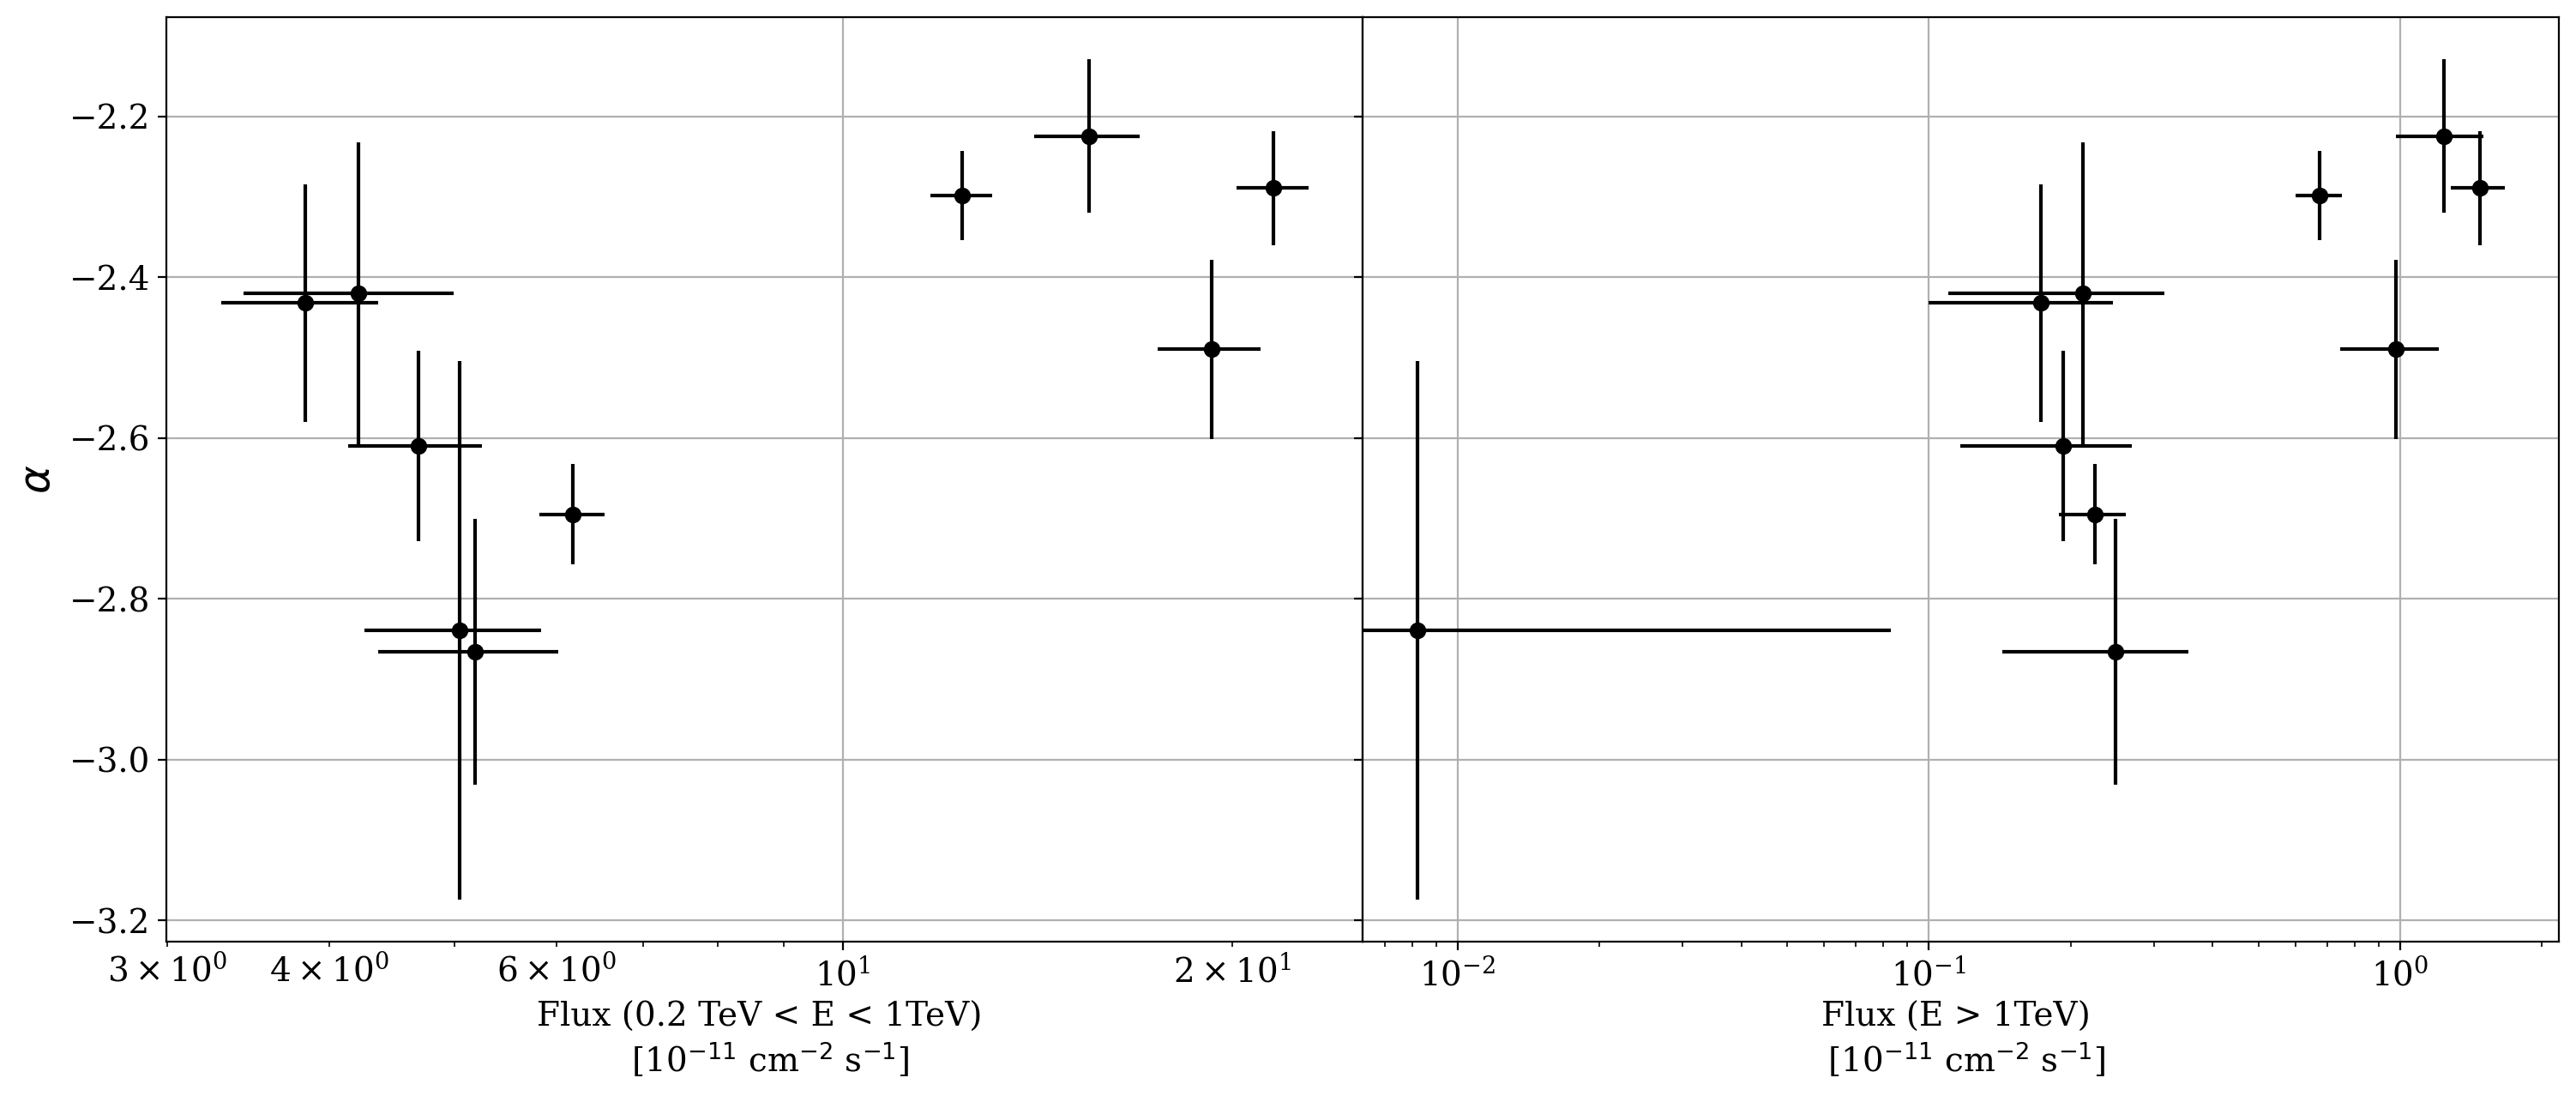

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(18,7), sharey = True)
fig.subplots_adjust(wspace=0.0, hspace=0.0)
axs[0].errorbar(flux1.flatten()/10e-12, Alpha_b, yerr = Alpha_b_err , xerr = flux_err1.flatten()/10e-12, color='black', fmt='o')
#axs[0].set_title(r'Alpha variability for the Energy range 0.2-1TeV')
axs[0].set_xlabel('Flux (0.2 TeV < E < 1TeV) \n [10$^{-11}$ cm$^{-2}$ s$^{-1}$]')
axs[0].set_ylabel(r'$\alpha$', fontsize = 18)
axs[0].set_xscale('log')
axs[0].grid(True)
#plt.show()
axs[1].errorbar(flux2.flatten()/10e-12, Alpha_b, yerr= Alpha_b_err , xerr = flux_err2.flatten()/10e-12, color='black',fmt='o')
#axs[1].set_title(r'Alpha variability for the Energy greater that 1 TeV')
axs[1].set_xlabel('Flux (E > 1TeV) \n [10$^{-11}$ cm$^{-2}$ s$^{-1}$]')
#axs[1].set_ylabel(r'Alpha')
axs[1].set_xscale('log')
axs[1].grid(True)
#plt.show()
plt.savefig('alpha_variability_with_En_MAGIC.png')

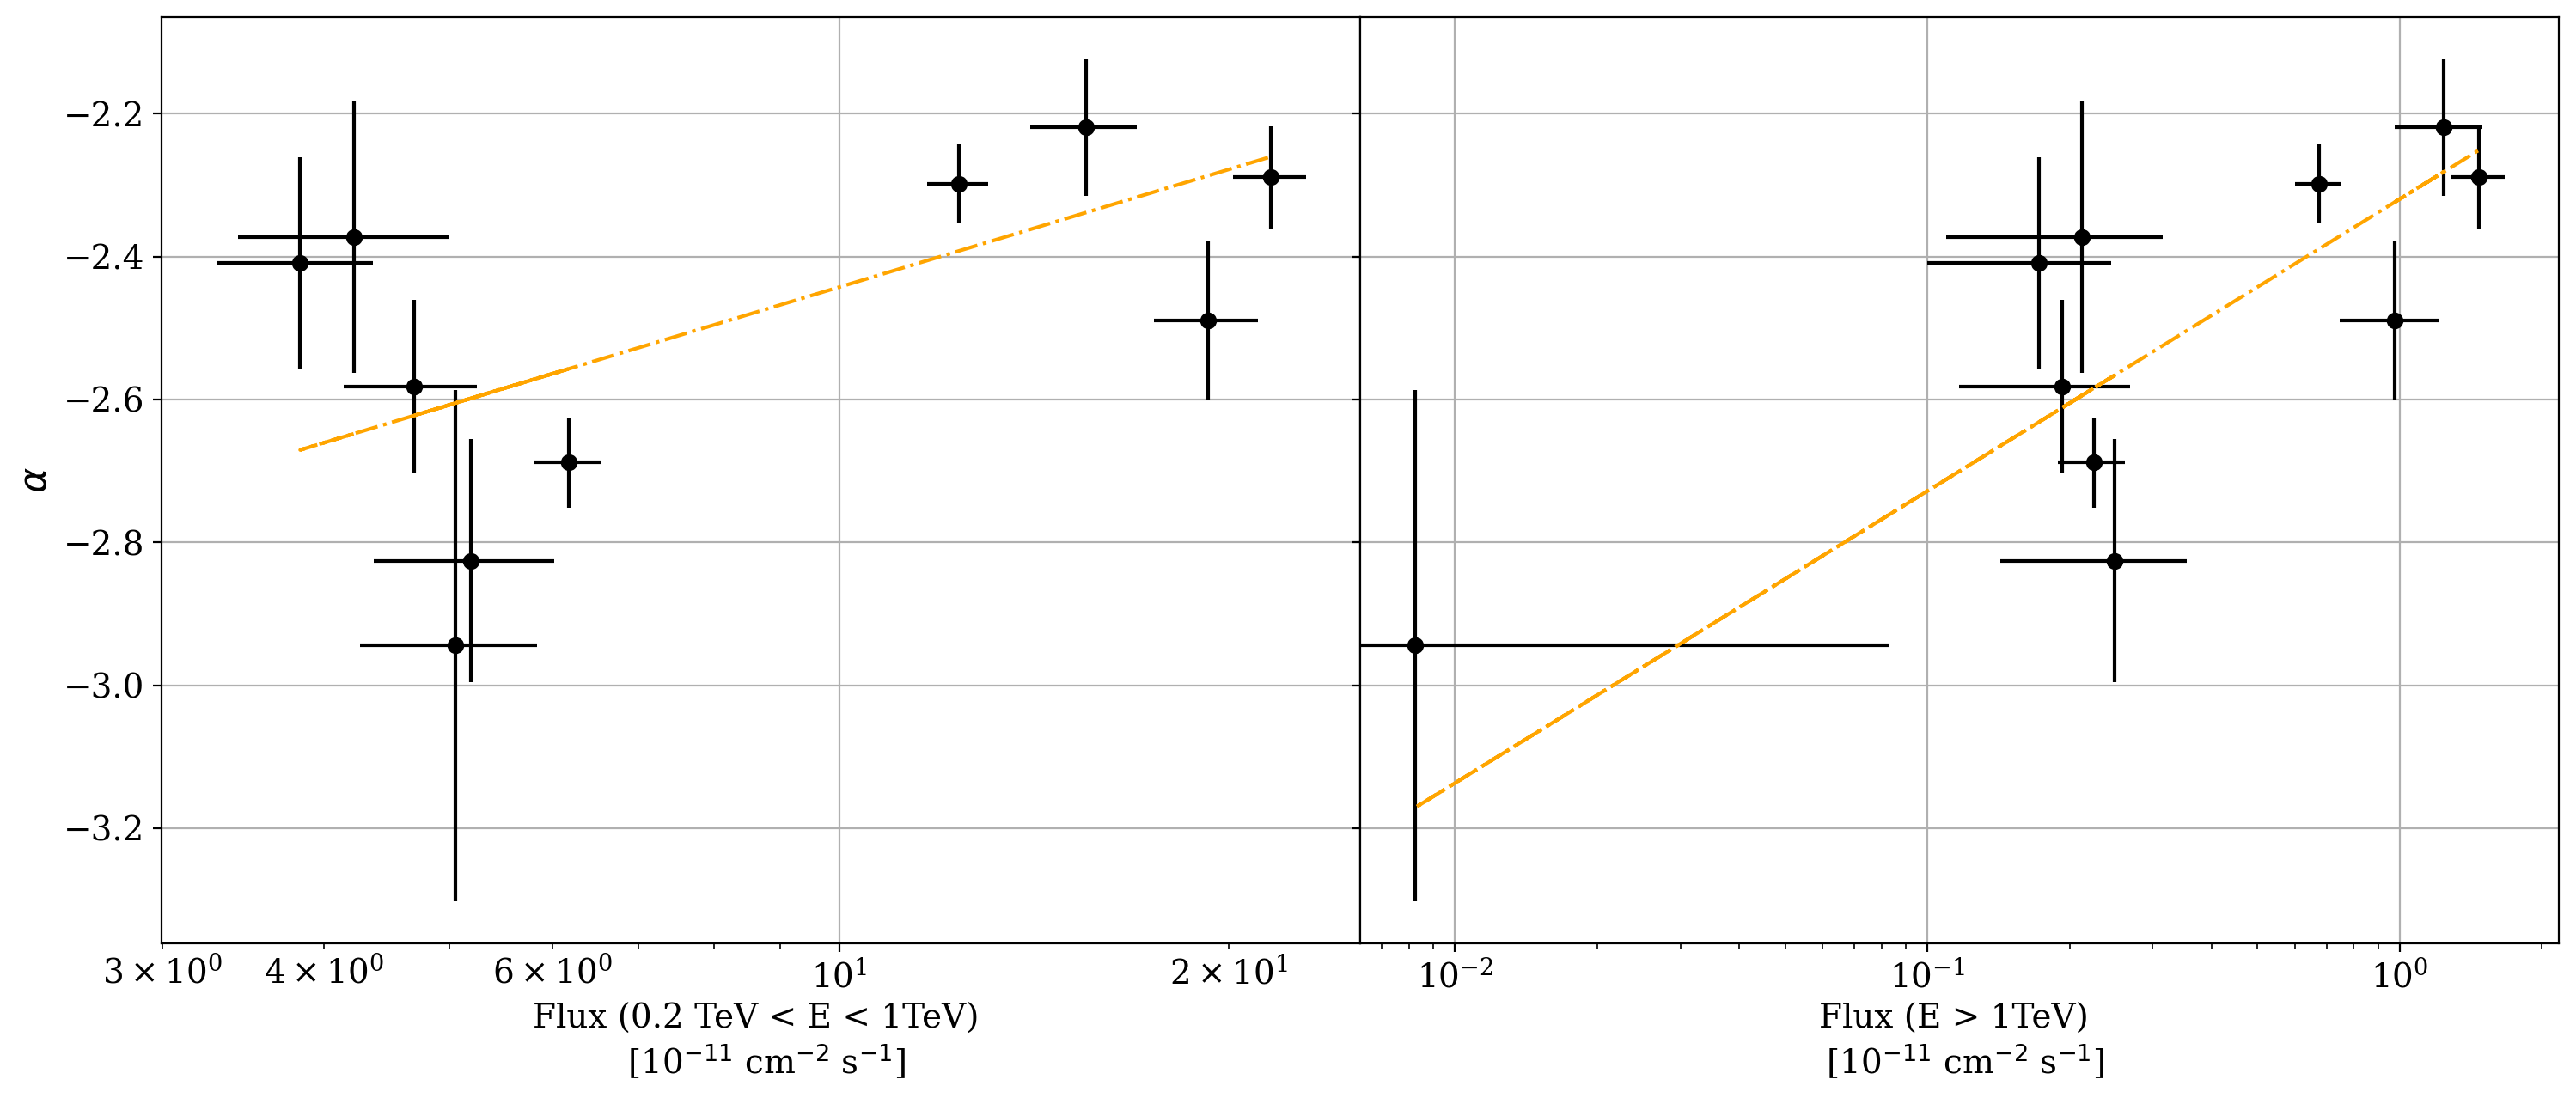

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(18,7), sharey=True)
plt.subplots_adjust(hspace=0.3,wspace=0.0)
popt_ls1tev, pcov_ls1tev = curve_fit(lin_func, np.log10(flux1.flatten()), Alpha_b_minE, sigma=Alpha_b_minE_err, absolute_sigma=True)
axs[0].errorbar(flux1.flatten()/10e-12, Alpha_b_minE, yerr = Alpha_b_minE_err , xerr = flux_err1.flatten()/10e-12, color='black', fmt='o')
axs[0].plot(flux1.flatten()/10e-12, lin_func(np.log10(flux1.flatten()), *popt_ls1tev), color='orange', linestyle='-.')
#axs[0].set_title(r'Alpha variability for the Energy range 0.2-1TeV')
axs[0].set_xlabel('Flux (0.2 - 1 TeV) \n [10$^{-11}$ cm$^{-2}$ s$^{-1}$]')
axs[0].set_ylabel(r'$\alpha$', fontsize=16)
axs[0].set_xscale('log')
axs[0].grid(True)
#plt.show()
popt_gs1tev, pcov_gs1tev = curve_fit(lin_func, np.log10(flux2.flatten()), Alpha_b_minE, sigma=Alpha_b_minE_err, absolute_sigma=True)
axs[1].errorbar(flux2.flatten()/10e-12, Alpha_b_minE, yerr = Alpha_b_minE_err , xerr = flux_err2.flatten()/10e-12, color='black', fmt='o')
axs[1].plot(flux2.flatten()/10e-12, lin_func(np.log10(flux2.flatten()), *popt_gs1tev), color='orange', linestyle='-.')
#axs[1].set_title(r'Alpha variability for the Energy greater that 1 TeV')
axs[1].set_xlabel('Flux (> 1TeV) \n [10$^{-11}$ cm$^{-2}$ s$^{-1}$]')
#axs[1].set_ylabel(r'Alpha')
axs[1].set_xscale('log')
axs[1].grid(True)

#plt.show()
plt.savefig('variability_alpha_with_flux_minE_MAGIC.png')

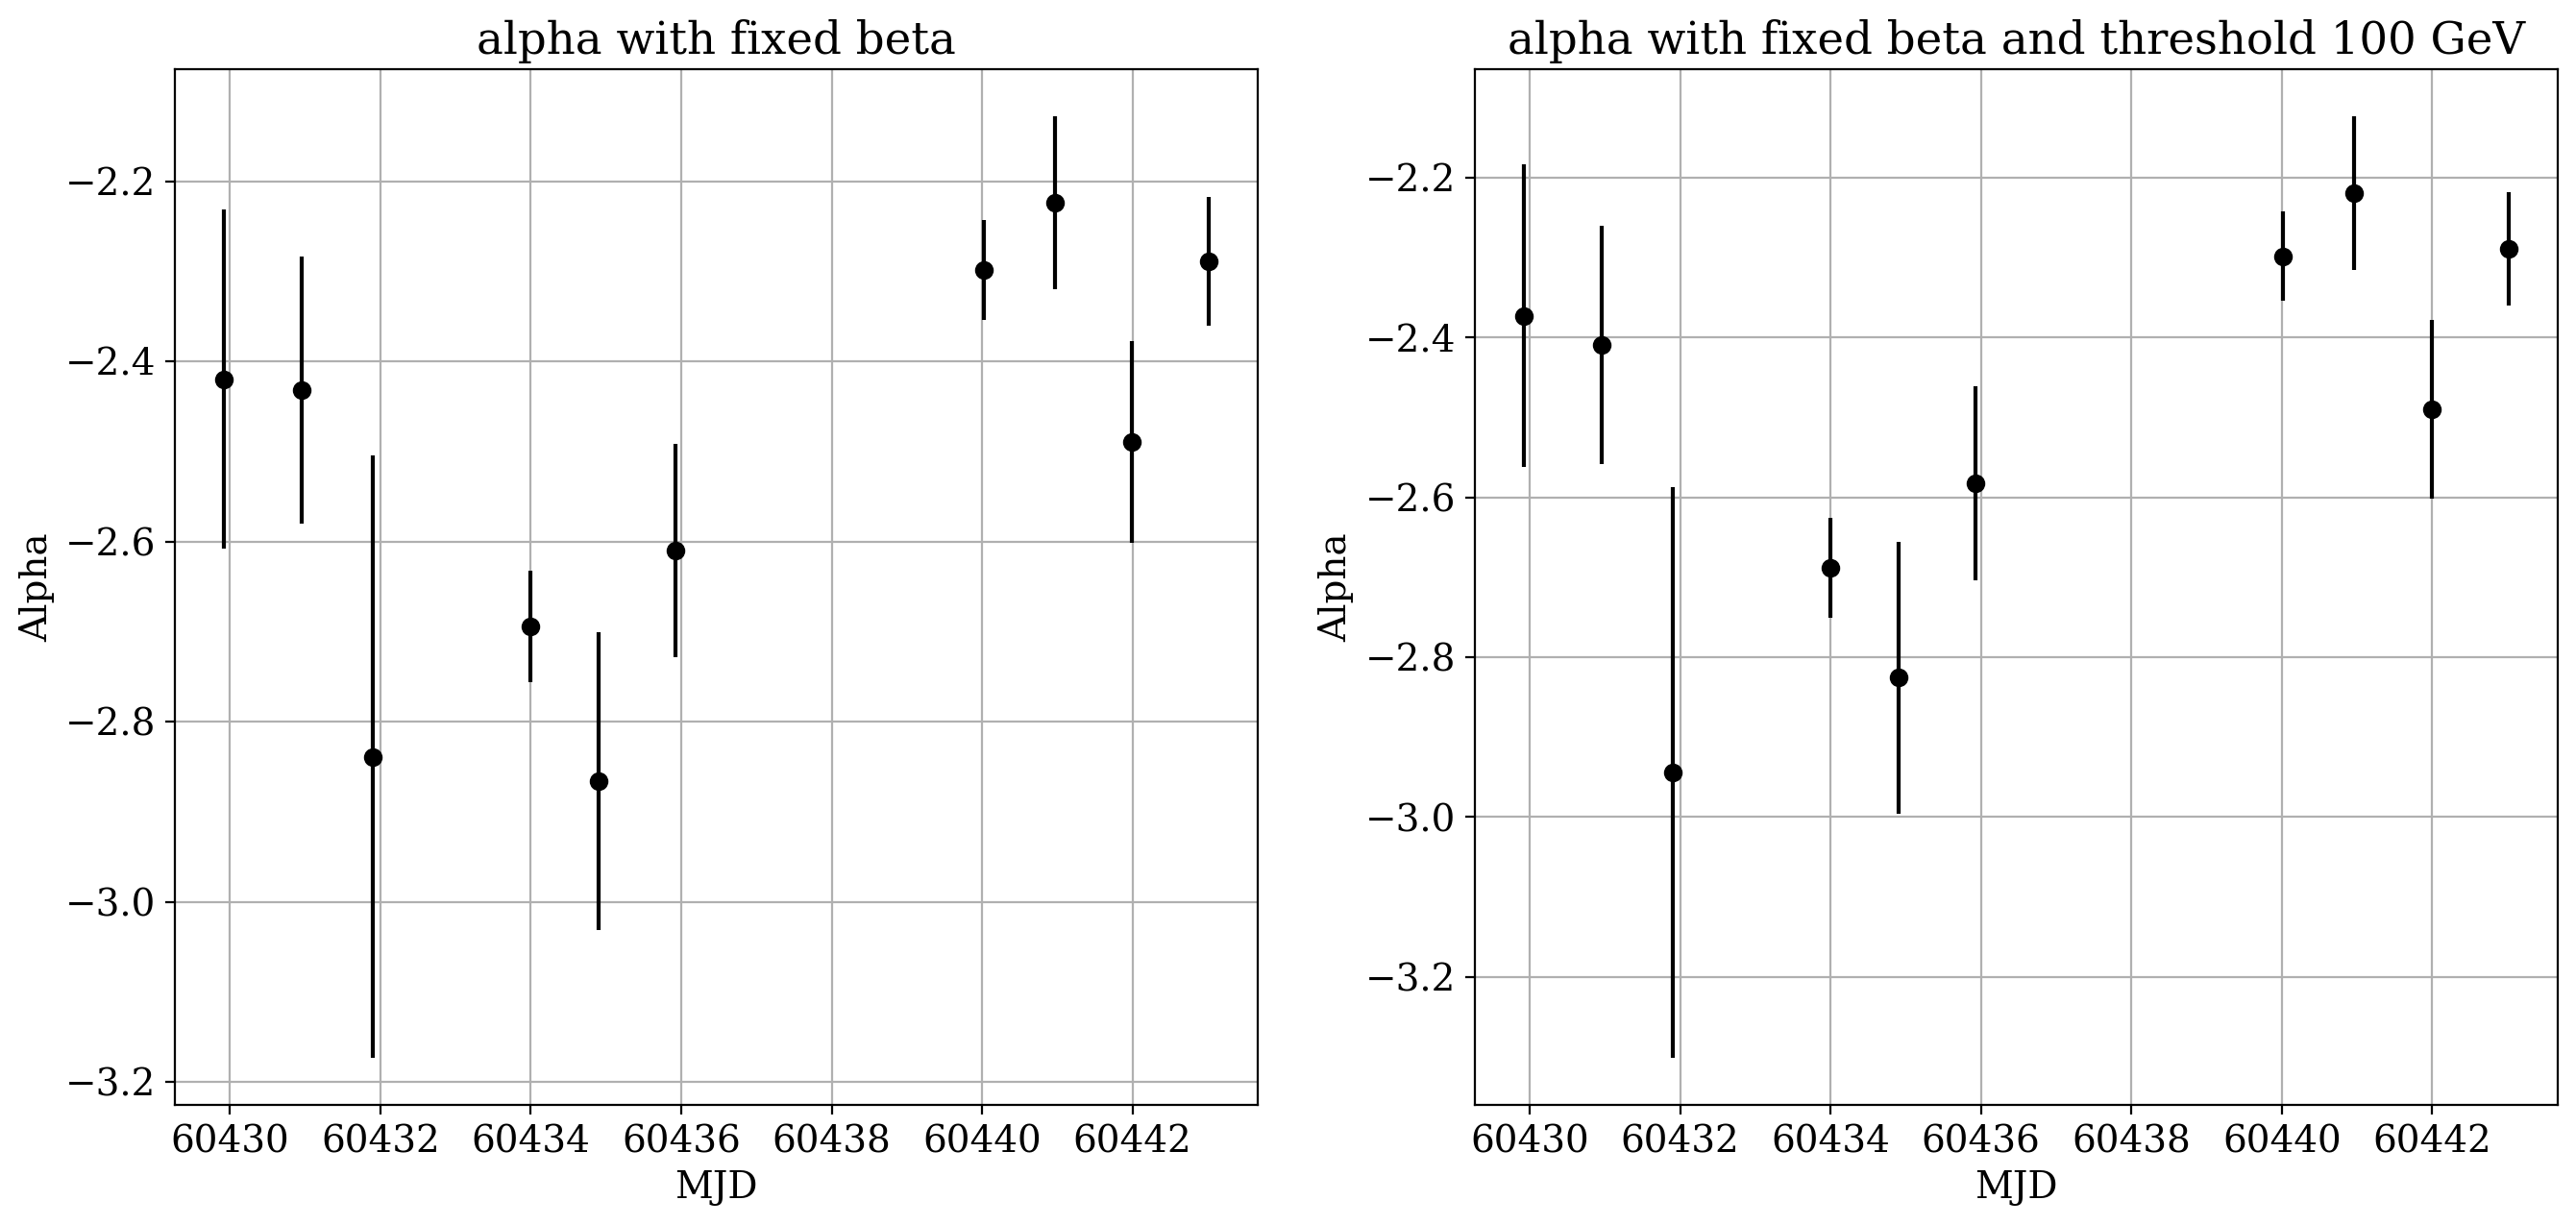

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(16,7))
axs[0].errorbar(MJD, Alpha_b, yerr = Alpha_b_err, color = 'black', fmt='o')
axs[0].set_title(r'alpha with fixed beta')
axs[0].set_xlabel(r'MJD')
axs[0].set_ylabel(r'Alpha')
axs[0].grid(True)
#plt.show()
axs[1].errorbar(MJD, Alpha_b_minE, yerr = Alpha_b_minE_err, color = 'black', fmt = 'o')
axs[1].set_title(r'alpha with fixed beta and threshold 100 GeV')
axs[1].set_xlabel(r'MJD')
axs[1].set_ylabel(r'Alpha')
axs[1].grid(True)
plt.show()

## Hardness ratio

In [71]:
indices = np.where(np.logical_and(final_mjd>=60428, final_mjd<= 60445.01))
ixpe_fgamma1 = finalflux1[indices]
ixpe_efgamma1 = finalEflux1[indices]
ixpe_f_gamma1 = final_flux1[indices]
ixpe_ef_gamma1 = final_Eflux1[indices]

In [73]:
ind = np.where(np.logical_and(xrt_mjd_gs2kev>=60428, xrt_mjd_gs2kev<= 60445.01))
ixpe_xrt_f_gs2kev = xrt_f_gs2kev[ind]
ixpe_xrt_f_ls2kev = xrt_f_ls2kev[ind]

ixpe_xrt_eflow_ls = xrt_eflow_ls[ind]
ixpe_xrt_eflow_gs = xrt_eflow_gs[ind]
ixpe_xrt_efhigh_gs = xrt_efhigh_gs[ind]
ixpe_xrt_efhigh_ls = xrt_efhigh_ls[ind]

In [75]:
f_xrt_ratio = 10**(ixpe_xrt_f_gs2kev)/10**(ixpe_xrt_f_ls2kev)
flux_xrt_ratio_err = np.abs(f_xrt_ratio)*np.sqrt((ixpe_xrt_efhigh_gs/10**(ixpe_xrt_f_gs2kev))**2+(ixpe_xrt_efhigh_ls/10**(ixpe_xrt_f_ls2kev))**2)

In [77]:
flux_g_ratio = ixpe_fgamma1/ixpe_f_gamma1
flux_g_ratio_err = np.abs(flux_g_ratio)*np.sqrt((ixpe_efgamma1/ixpe_fgamma1)**2+(ixpe_ef_gamma1/ixpe_f_gamma1)**2)

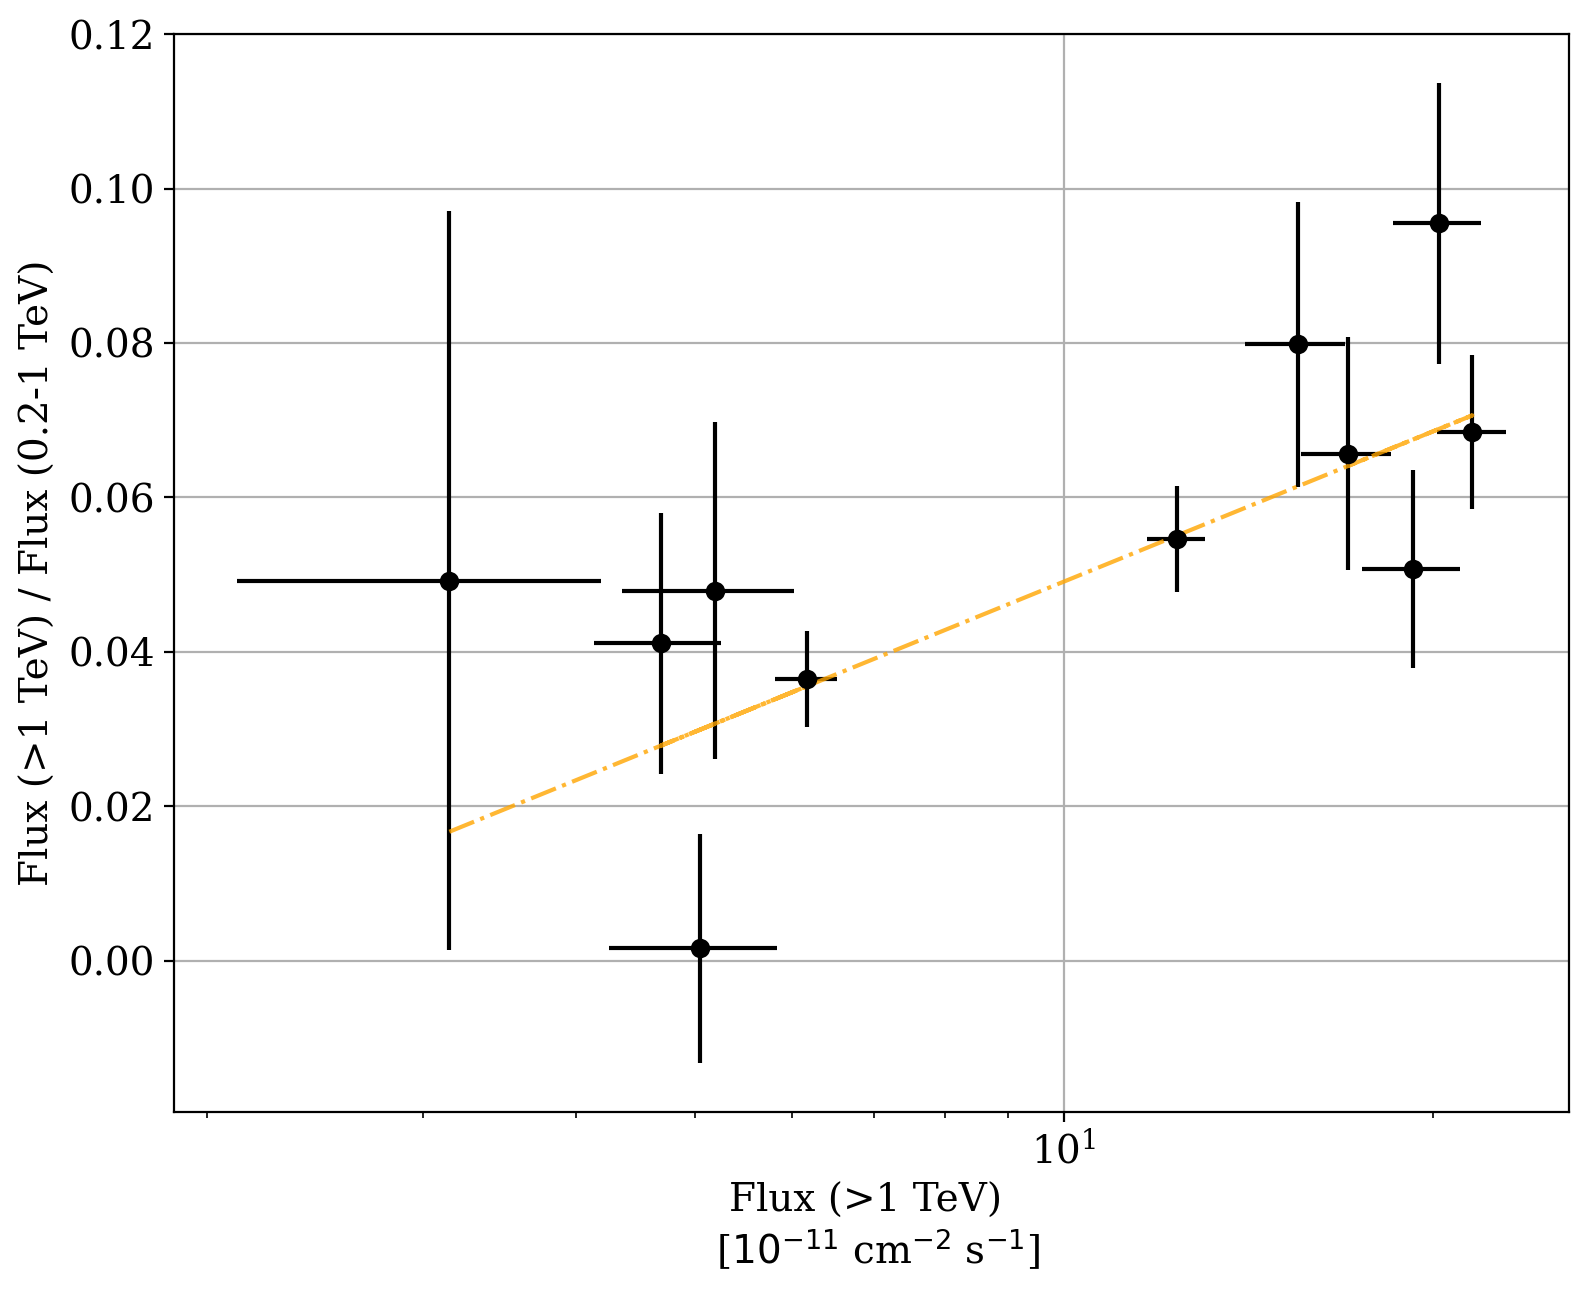

In [79]:
par_HD_gamma, pcov_HD_gamma= curve_fit(lin_func, np.log10(ixpe_f_gamma1), flux_g_ratio, sigma=flux_g_ratio_err, absolute_sigma=True)
plt.figure(figsize=(9,7))
plt.errorbar(ixpe_f_gamma1/10e-12, flux_g_ratio, yerr = flux_g_ratio_err, xerr = ixpe_ef_gamma1/10e-12, color = 'black', fmt ='o')
plt.plot(ixpe_f_gamma1/10e-12, lin_func(np.log10(ixpe_f_gamma1), *par_HD_gamma), color='orange', alpha=0.8, linestyle = '-.')
#plt.title('Hardness ratio for MAGIC data during IXPE observations window')
plt.xlabel('Flux (>1 TeV) \n [$10^{-11}$ cm$^{-2}$ s$^{-1}$]')
plt.ylabel(r'Flux (>1 TeV) / Flux (0.2-1 TeV)')
plt.xscale('log')
plt.grid(True)
plt.subplots_adjust(hspace=0.3)
plt.savefig('HD_ratio_MAGIC.png')

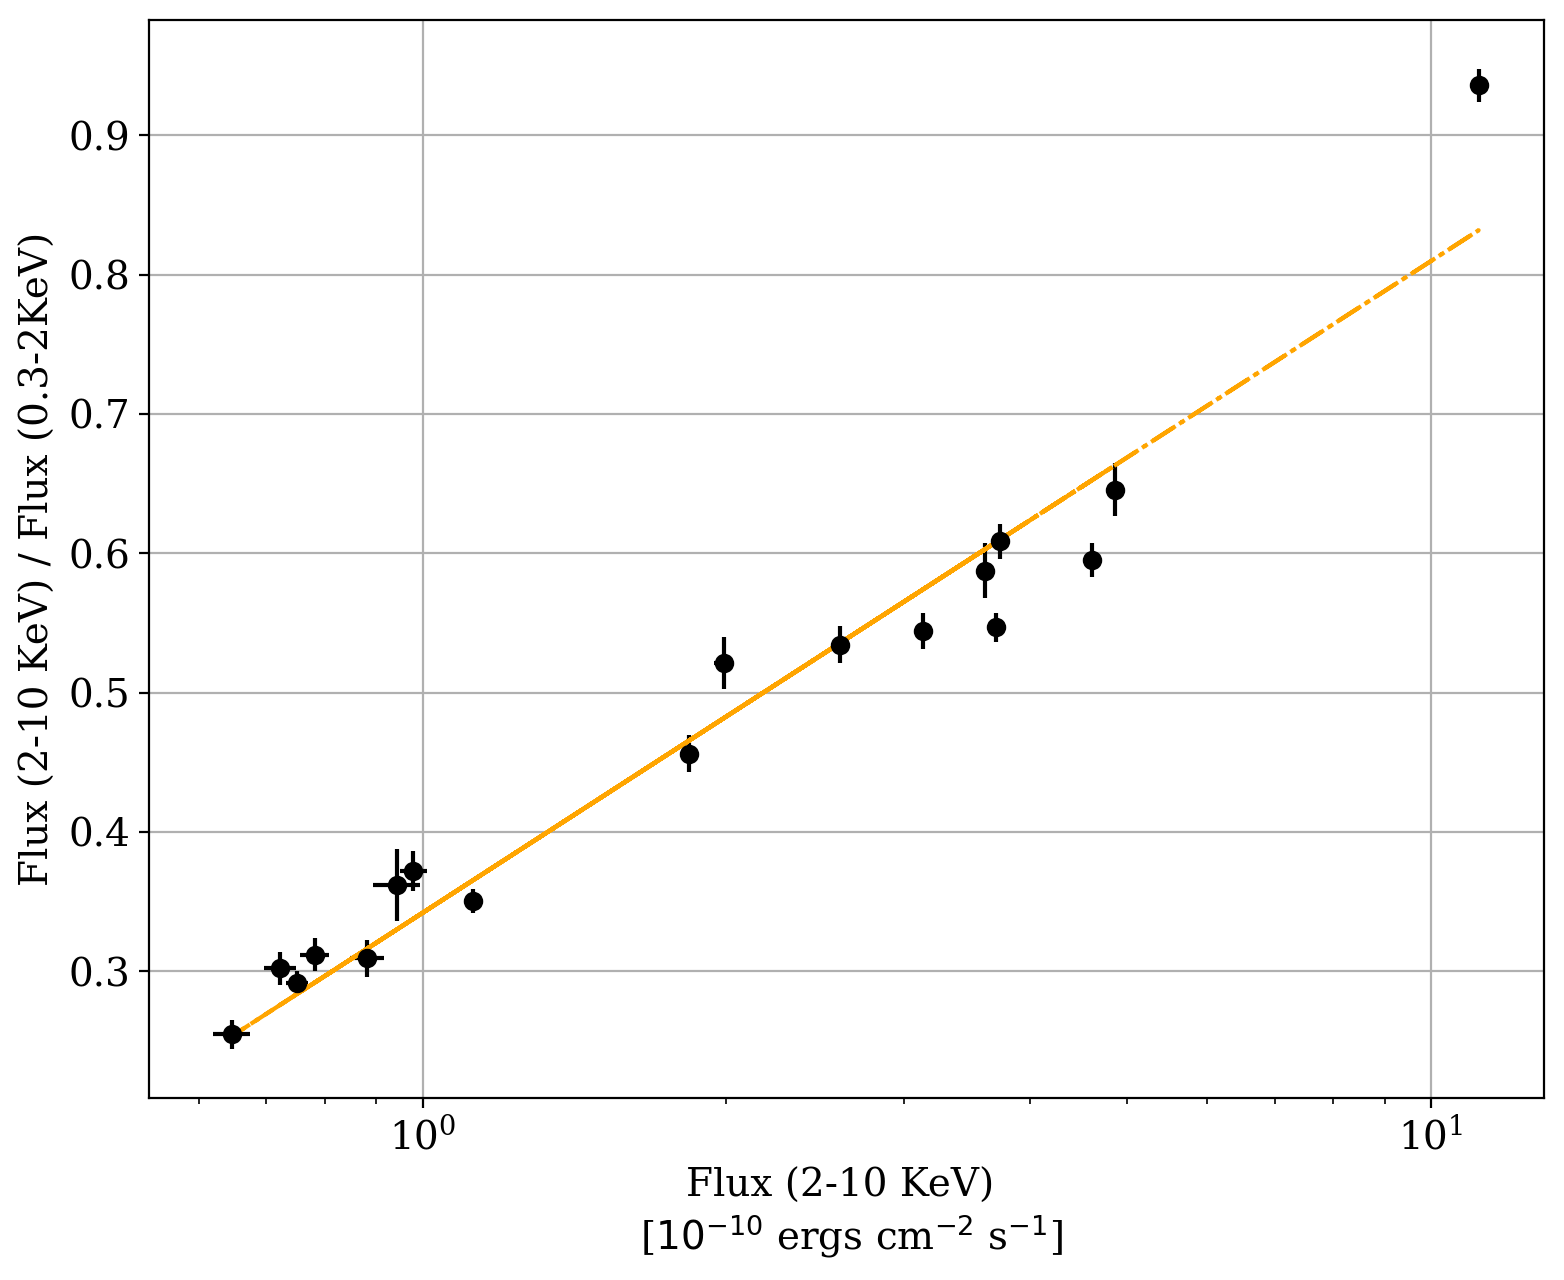

In [81]:
par_HD_xray, pcov_HD_xray= curve_fit(lin_func, ixpe_xrt_f_gs2kev, f_xrt_ratio, sigma=flux_xrt_ratio_err, absolute_sigma=True)
plt.figure(figsize=(9,7))
plt.errorbar(10**(ixpe_xrt_f_gs2kev)/10e-11, f_xrt_ratio, yerr = flux_xrt_ratio_err, xerr = [(ixpe_xrt_eflow_ls)/10e-11, (ixpe_xrt_efhigh_ls)/10e-11], color = 'black',fmt = 'o')
plt.plot(10**(ixpe_xrt_f_gs2kev)/10e-11, lin_func(ixpe_xrt_f_gs2kev, *par_HD_xray), color='orange', linestyle = '-.')
#plt.title('Hardness ratio for SWIFT-XRT data during IXPE observations window')
plt.xlabel('Flux (2-10 KeV) \n [$10^{-10}$ ergs cm$^{-2}$ s$^{-1}$] ')
plt.ylabel('Flux (2-10 KeV) / Flux (0.3-2KeV)')
plt.xscale('log')
plt.grid(True)
plt.subplots_adjust(hspace=0.3)
plt.savefig('HD_ratio_SWIFT_XRT.png')

### Pearson correlation coefficient of X-ray and VHE flux and their respective hardness ratio

In [131]:
from scipy.stats import pearsonr
r_value1, p_value1 = pearsonr(10**(ixpe_xrt_f_gs2kev), f_xrt_ratio)
r_value2, p_value2 = pearsonr(ixpe_f_gamma1, flux_g_ratio)

def p_to_sigma(p):
    return norm.ppf(p)

sig1 = p_to_sigma(1-p_value1/2)
sig2 = p_to_sigma(1-p_value2/2)
def pearson_err(r, n):
    return np.sqrt((1-r**2)/(n-2))

err1 = pearson_err(r_value1, 18)
err2 = pearson_err(r_value2, 11)

print(sig1, r_value1, sig2, r_value2, err1, err2)

6.04224544106757 0.9506278978949247 2.461293532561418 0.7126649495088346 0.07758326162254514 0.23383485856988195


## spectral behaviour on 04th may and 10th may 2024

In [83]:
#spectral behaviour on 04th may and 10th may 2024
fold_0405=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/fold_0504.root")
fold_1005=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/fold_0510.root")

In [85]:
fold_0405.keys()
dSED_0405=fold_0405['deabsorbed_sed;1']
dSED_1005=fold_1005['deabsorbed_sed;1']
nu_0405=dSED_0405.all_members['fX']
flux_0405=dSED_0405.all_members['fY']
flux_0405EYhigh=dSED_0405.all_members['fEYhigh']
flux_0405EYlow=dSED_0405.all_members['fEYlow']
nu_1005=dSED_1005.all_members['fX']
flux_1005=dSED_1005.all_members['fY']
flux_1005EYhigh=dSED_1005.all_members['fEYhigh']
flux_1005EYlow=dSED_1005.all_members['fEYlow']

In [95]:
flute1_0405=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/flute1_0405.root")
flute2_1005=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/flute2_1005.root")
flute2_0405=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/flute2_0405.root")
flute1_1005=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/flute1_1005.root")

flute_0405=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/flute_0405.root")
flute_1005=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/run_wise/flute_1005.root")

In [97]:
LC1_0405 = flute1_0405['LightCurve;1']
LC1_1005 = flute1_1005['LightCurve;1']
LC2_0405 = flute2_0405['LightCurve;1']
LC2_1005 = flute2_1005['LightCurve;1']
LC_0405 = flute_0405['LightCurve;1']
LC_1005 = flute_1005['LightCurve;1']
MJD1_0405 = LC1_0405.all_members['fX']
f1_0405 = LC1_0405.all_members['fY']
MJD1_0405E = LC1_0405.all_members['fEX']
f1_0405E = LC1_0405.all_members['fEY']
MJD1_1005 = LC1_1005.all_members['fX']
f1_1005 = LC1_1005.all_members['fY']
MJD1_1005E = LC1_1005.all_members['fEX']
f1_1005E = LC1_1005.all_members['fEY']

MJD2_0405 = LC2_0405.all_members['fX']
f2_0405 = LC2_0405.all_members['fY']
MJD2_0405E = LC2_0405.all_members['fEX']
f2_0405E = LC2_0405.all_members['fEY']
MJD2_1005 = LC2_1005.all_members['fX']
f2_1005 = LC2_1005.all_members['fY']
MJD2_1005E = LC2_1005.all_members['fEX']
f2_1005E = LC2_1005.all_members['fEY']

MJD_0405 = LC_0405.all_members['fX']
f_0405 = LC_0405.all_members['fY']
MJD_0405E = LC_0405.all_members['fEX']
f_0405E = LC_0405.all_members['fEY']
MJD_1005 = LC_1005.all_members['fX']
f_1005 = LC_1005.all_members['fY']
MJD_1005E = LC_1005.all_members['fEX']
f_1005E = LC_1005.all_members['fEY']

In [99]:
MJD_0405shifted = MJD1_0405 - MJD1_0405[0]

MJD_1005shifted = MJD1_1005 - MJD1_1005[0]

#define a function
def lin_func(x, m, c):
    return m*x+c

def poly_func(x, a, b, z):
    return a*(x**2)+b*x+c

def simple_func(x, j, k):
    return j*x+ k
params1_0405, pcov1_0405 = curve_fit(lin_func, MJD1_0405, f1_0405, sigma=f1_0405E, absolute_sigma=True)
params2_0405, pcov2_0405 = curve_fit(lin_func, MJD2_0405, f2_0405, sigma=f2_0405E, absolute_sigma=True)
params1_1005, pcov1_1005 = curve_fit(lin_func, MJD1_1005, f1_1005, sigma=f1_1005E, absolute_sigma=True)
params2_1005, pcov2_1005 = curve_fit(lin_func, MJD2_1005, f2_1005, sigma=f2_1005E, absolute_sigma=True)

params_0405, pcov_0405 = curve_fit(lin_func, MJD_0405, f_0405, sigma=f_0405E, absolute_sigma=True)
params_1005, pcov_1005 = curve_fit(lin_func, MJD_1005, f_1005, sigma=f_1005E, absolute_sigma=True)

mean_f1_0405 = np.mean(f1_0405)
mean_f2_0405 = np.mean(f2_0405)
mean_f1_1005 = np.mean(f1_1005)
mean_f2_1005 = np.mean(f2_1005)
print(params_0405)
print(params_1005)
print(mean_f1_0405)

[ 2.79745138e-11 -1.69059364e-06]
[-1.88947357e-10  1.14200247e-05]
6.593715338502057e-11


<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12984/1483283952.py:10: SyntaxWarning: invalid escape sequence '\c'
  axs[1].axhline(y=mean_f1_0405/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f1_0405:.2e}, $\chi^2$/dof = {chisq1_0405_con:.2f}/14 (2.009$\sigma$)')
/tmp/ipykernel_12984/1483283952.py:10: SyntaxWarning: invalid escape sequence '\s'
  axs[1].axhline(y=mean_f1_0405/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f1_0405:.2e}, $\chi^2$/dof = {chisq1_0405_con:.2f}/14 (2.009$\sigma$)')
/tmp/ipykernel_12984/1483283952.py:20: SyntaxWarning: invalid escape sequence '\c'
  axs[0].axhl

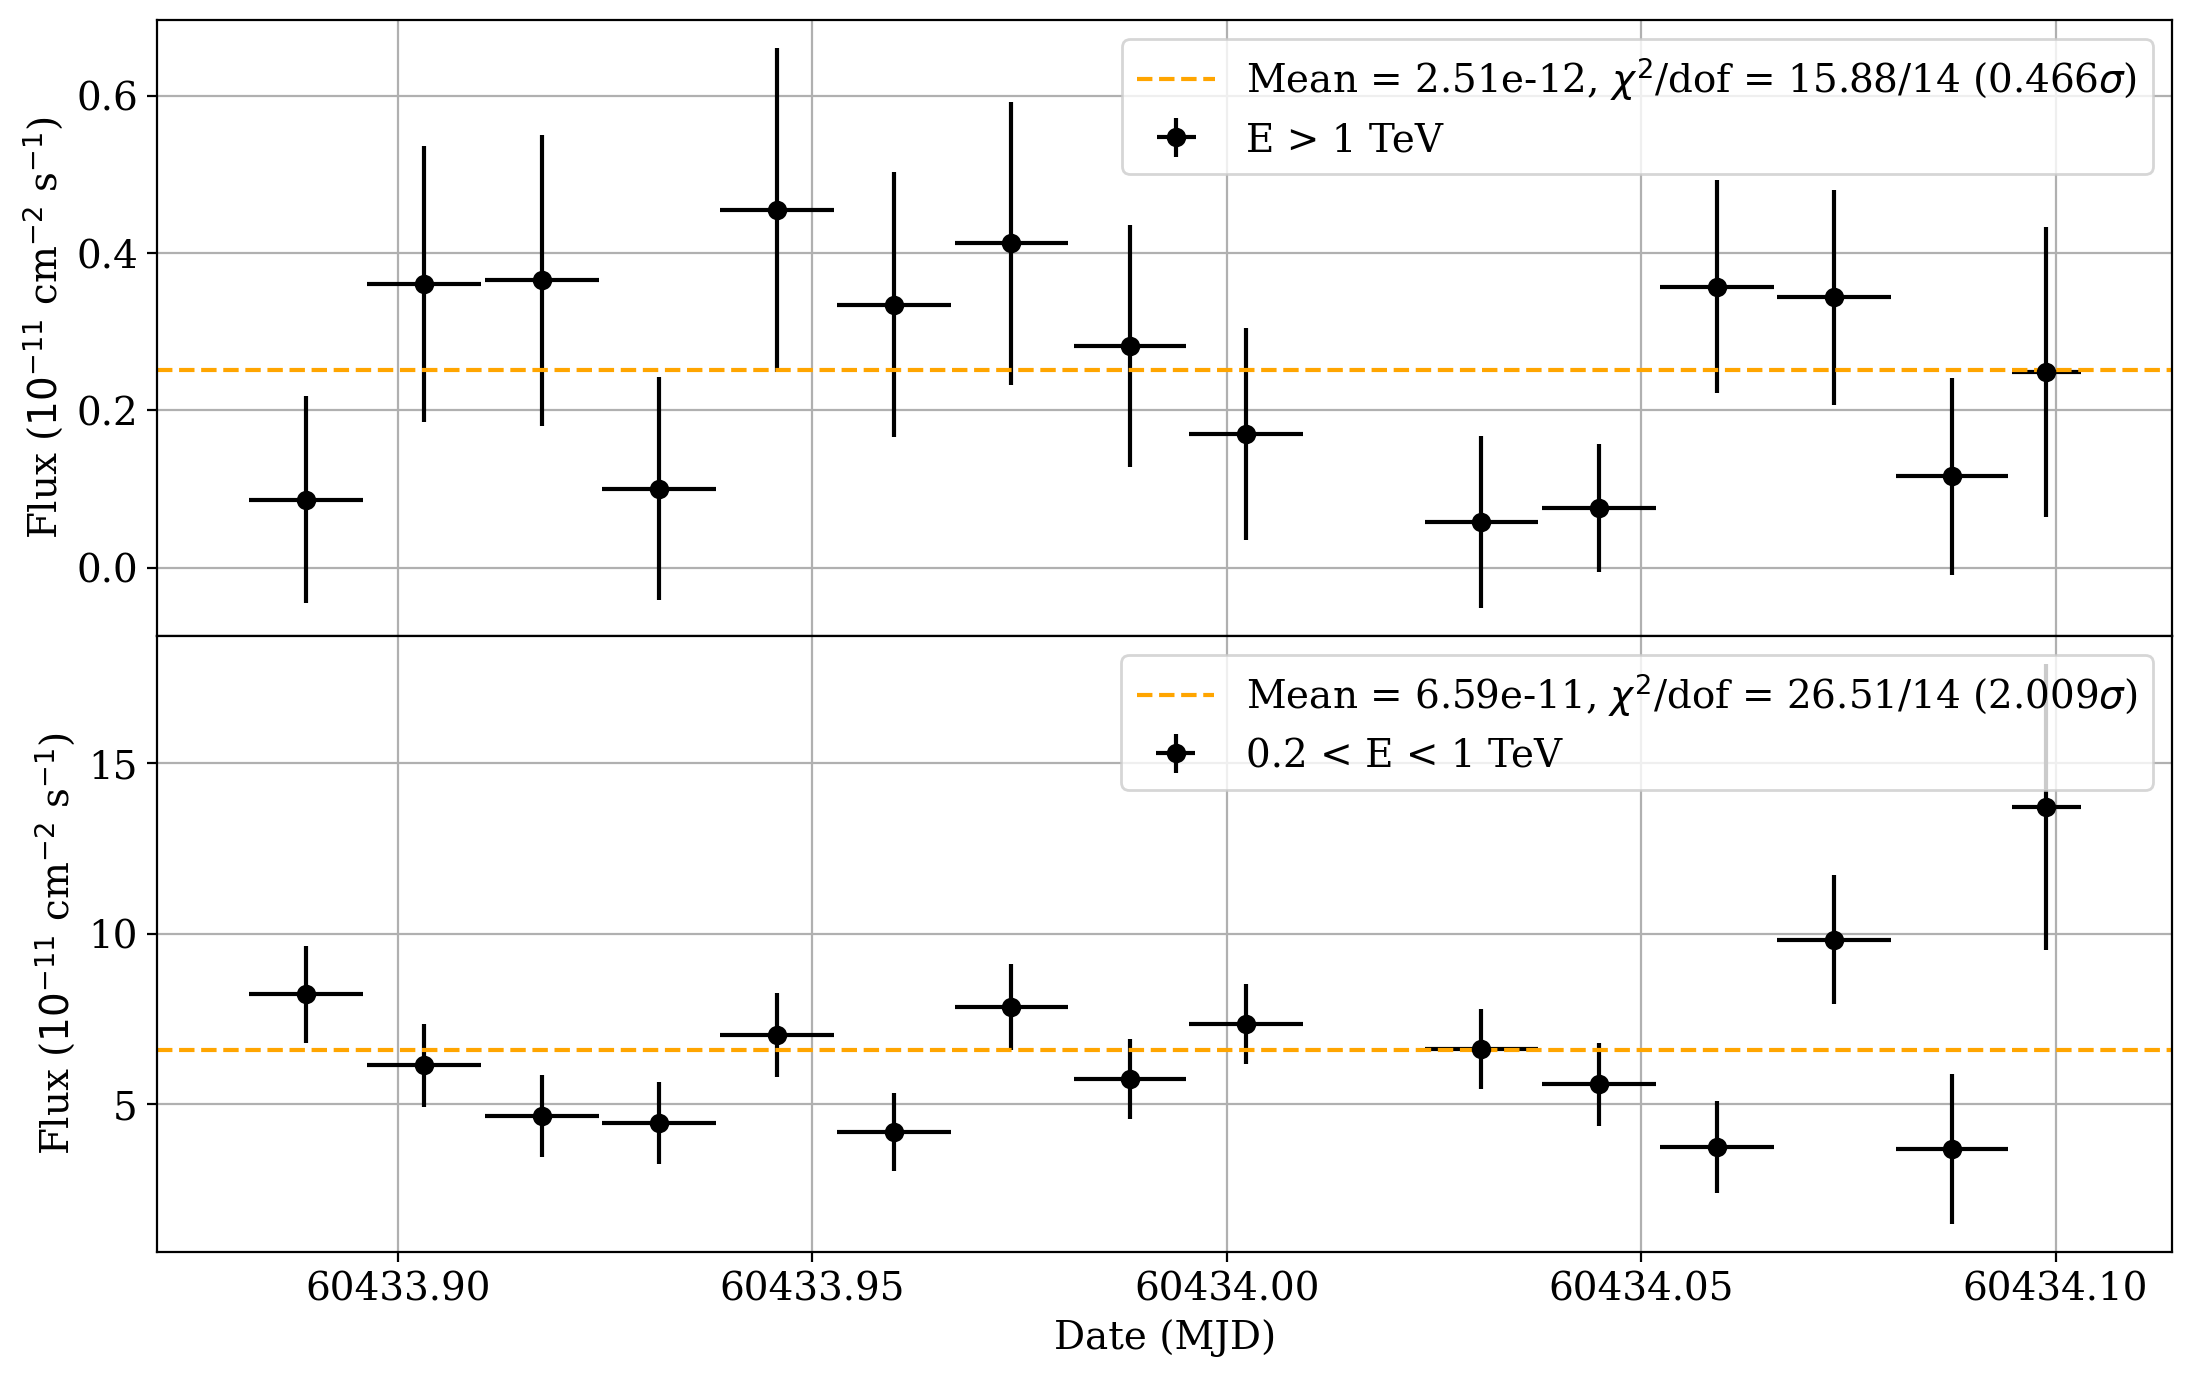

In [105]:
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False) # Ensure no scientific notation overall

fig, axs = plt.subplots(2, 1, figsize=(13,8), sharex=True)
plt.subplots_adjust(hspace=0.0)
axs[1].errorbar(MJD1_0405,f1_0405/10e-12, yerr=f1_0405E/10e-12, xerr=MJD1_0405E , color='black',label="0.2 < E < 1 TeV", fmt='o')
#axs[0].plot(MJD1_0405, lin_func(MJD1_0405, *params1_0405)/10e-12, color='red', label= f'linear fit , $\chi^2$/dof = {chisq1_0405_lin:.2f}/13')
axs[1].axhline(y=mean_f1_0405/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f1_0405:.2e}, $\chi^2$/dof = {chisq1_0405_con:.2f}/14 (2.009$\sigma$)')
#axs[0].set_title('Lightcurve for MJD 60433')
axs[1].set_ylabel(r'Flux ($10^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[1].set_xlabel(r'Date (MJD)')
axs[1].legend()
axs[1].grid(True)
#axs[0].tick_params(axis='x', labelrotation=45)
#############################################
axs[0].errorbar(MJD2_0405, f2_0405/10e-12, yerr=f2_0405E/10e-12, xerr=MJD2_0405E, color='black',label="E > 1 TeV", fmt='o')
#axs1].plot(MJD2_0405, lin_func(MJD2_0405, *params2_0405)/10e-12, color='red', label= f'linear fit , $\chi^2$/dof = {chisq2_0405_lin:.2f}/13')
axs[0].axhline(y=mean_f2_0405/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f2_0405:.2e}, $\chi^2$/dof = {chisq2_0405_con:.2f}/14 (0.466$\sigma$)')

axs[0].set_ylabel(r'Flux ($10^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[0].legend()
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(formatter)
plt.savefig('intranight_var_0405.png')
#axs[1].tick_params(axis='x', labelrotation=45)

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12984/4019329737.py:5: SyntaxWarning: invalid escape sequence '\c'
  axs[1].axhline(y=mean_f1_1005/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f1_1005:.2e}, $\chi^2$/dof = {chisq1_1005_con:.2f}/7 (0.15$\sigma$)')
/tmp/ipykernel_12984/4019329737.py:5: SyntaxWarning: invalid escape sequence '\s'
  axs[1].axhline(y=mean_f1_1005/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f1_1005:.2e}, $\chi^2$/dof = {chisq1_1005_con:.2f}/7 (0.15$\sigma$)')
/tmp/ipykernel_12984/4019329737.py:15: SyntaxWarning: invalid escape sequence '\c'
  axs[0].axhline(y=mean

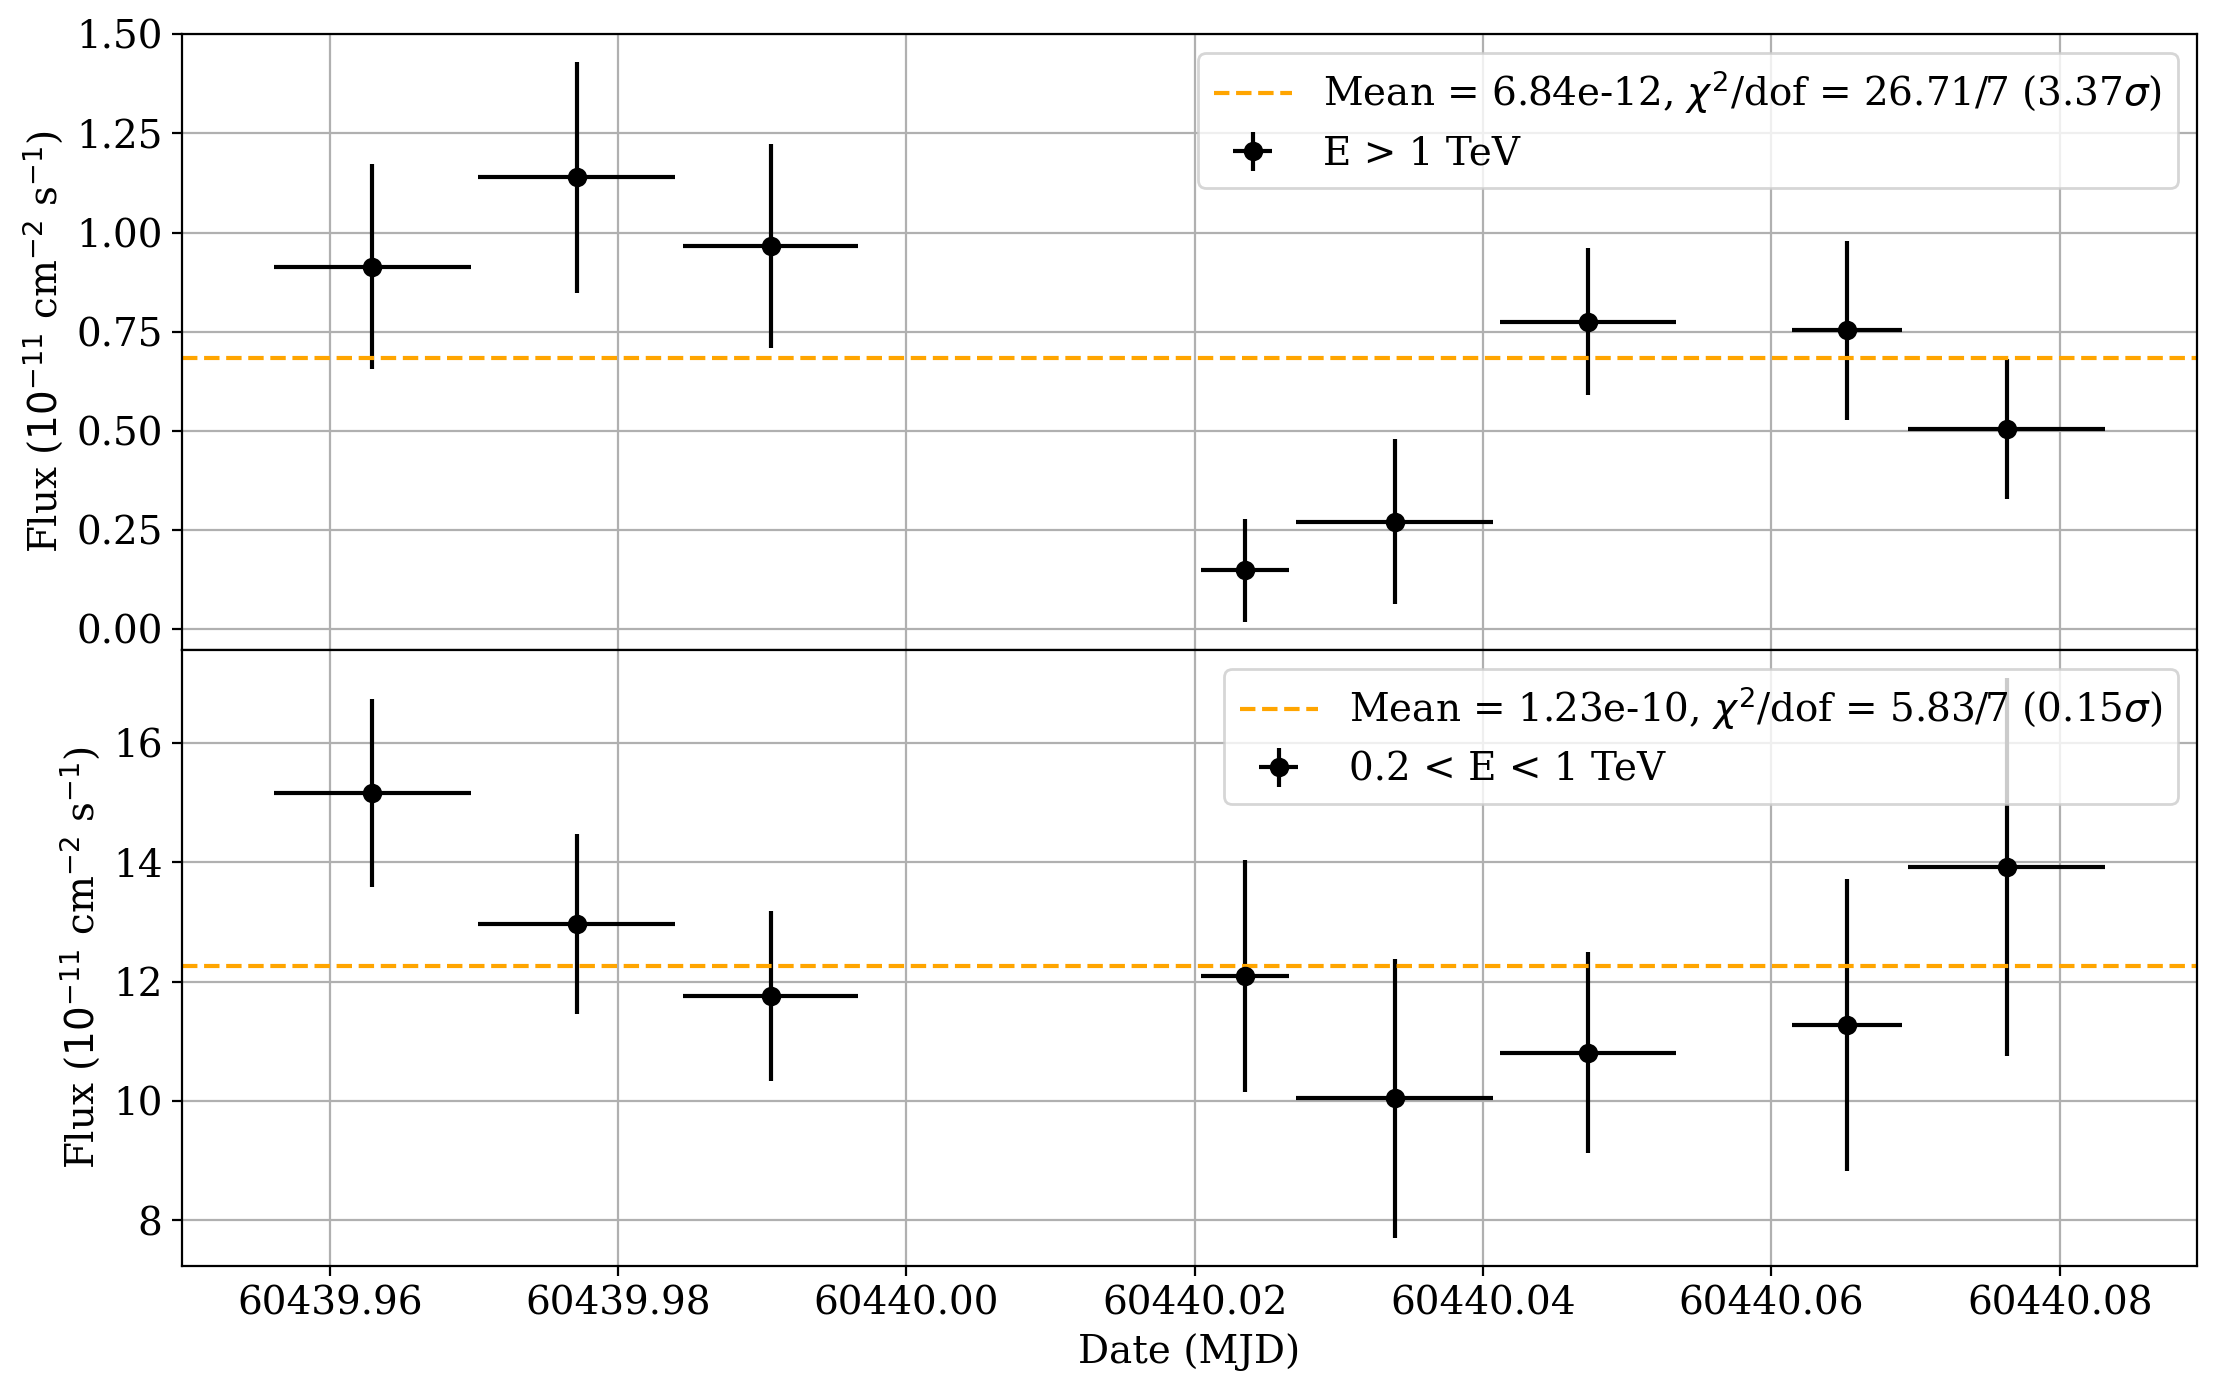

In [107]:
fig, axs = plt.subplots(2, 1, figsize=(13,8), sharex=True)
plt.subplots_adjust(hspace=0.0)
axs[1].errorbar(MJD1_1005,f1_1005/10e-12, yerr=f1_1005E/10e-12, xerr=MJD1_1005E , color='black',label="0.2 < E < 1 TeV", fmt='o')
#axs[0].plot(MJD1_1005, lin_func(MJD1_1005, *params1_1005)/10e-12, color='red', label= f'linear fit , $\chi^2$/dof = {chisq1_1005_lin:.2f}/6')
axs[1].axhline(y=mean_f1_1005/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f1_1005:.2e}, $\chi^2$/dof = {chisq1_1005_con:.2f}/7 (0.15$\sigma$)')
#axs[0].set_title('Lightcurve for MJD 60439')
#axs[0].set_xlabel(r'Date(MJD)')
axs[1].set_ylabel(r'Flux ($10^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[1].set_xlabel(r'Date (MJD)')
axs[1].legend(loc='best')
axs[1].grid(True)
#############################################
axs[0].errorbar(MJD2_1005, f2_1005/10e-12, yerr=f2_1005E/10e-12, xerr=MJD2_1005E, color='black',label="E > 1 TeV", fmt='o')
#axs[1].plot(MJD2_1005, lin_func(MJD2_1005, *params2_1005)/10e-12, color='red', label= f'linear fit , $\chi^2$/dof = {chisq2_1005_lin:.2f}/6')
axs[0].axhline(y=mean_f2_1005/10e-12, color='orange', linestyle='--', label=f'Mean = {mean_f2_1005:.2e}, $\chi^2$/dof = {chisq2_1005_con:.2f}/7 (3.37$\sigma$)')

axs[0].set_ylabel(r'Flux ($10^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[0].legend(loc='best')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(formatter)
plt.savefig('intranight_var_1005.png')


In [97]:
chisq1_1005_lin = np.sum((f1_1005 - lin_func(MJD1_1005, *params1_1005))**2/f1_1005E2)
chisq2_1005_lin = np.sum((f2_1005 - lin_func(MJD2_1005, *params2_1005))**2/f2_1005E2)
chisq1_0405_lin = np.sum((f1_0405 - lin_func(MJD1_0405, *params1_0405))**2/f1_0405E**2)
chisq2_0405_lin = np.sum((f2_0405 - lin_func(MJD2_0405, *params2_0405))**2/f2_0405E**2)

In [159]:
chisq1_1005_con = np.sum((f1_1005 - mean_f1_1005)**2/f1_1005E**2)
chisq2_1005_con = np.sum((f2_1005 - mean_f2_1005)**2/f2_1005E**2)
chisq1_0405_con = np.sum((f1_0405 - mean_f1_0405)**2/f1_0405E**2)
chisq2_0405_con = np.sum((f2_0405 - mean_f2_0405)**2/f2_0405E**2)

In [91]:
chisq_1005_con = np.sum(((f_1005 - np.mean(f_1005))**2)/f1_1005E**2)
chisq_0405_con = np.sum(((f_0405 - np.mean(f_0405))**2)/f_0405E**2)
chisq_1005_lin = np.sum((f_1005 - lin_func(MJD_1005, *params_1005))**2/f_1005E**2)
chisq_0405_lin = np.sum((f_0405 - lin_func(MJD_0405, *params_0405))**2/f_0405E**2)
print(f'MJD 60433:',chisq_0405_con)
print(f'reduced chi square value for a constant:',chisq_0405_con/14)
print(chisq_0405_lin)
print(f'reduced chi square value for a linear function:',chisq_0405_lin/14)
print(f'MJD 60439:',chisq_1005_con)
print(f'reduced chi square value for a constant:',chisq_1005_con/7)
print(chisq_1005_lin)
print(f'reduced chi square value for a linear function:',chisq_1005_lin/7)

MJD 60433: 25.55245234657195
reduced chi square value for a constant: 1.8251751676122823
22.29658915132285
reduced chi square value for a linear function: 1.592613510808775
MJD 60439: 2.9591495431309003
reduced chi square value for a constant: 0.42273564901870003
8.633674501406569
reduced chi square value for a linear function: 1.2333820716295099


In [93]:
print(f'MJD 60433:',np.std(f_0405))
print(f'MJD 60439:',np.std(f_1005))

MJD 60433: 7.536887372860809e-12
MJD 60439: 1.0888444510426225e-11


In [163]:
dof_0405 = len(f_0405) - 1
dof_1005 = len(f_1005) - 1
p1_0405 = 1 - stats.chi2.cdf(chisq1_0405_con, dof_0405)
p1_1005 = 1 - stats.chi2.cdf(chisq1_1005_con, dof_1005)
p2_0405 = 1 - stats.chi2.cdf(chisq2_0405_con, dof_0405)
p2_1005 = 1 - stats.chi2.cdf(chisq2_1005_con, dof_1005)

In [165]:
print(p1_0405)
print(p1_1005)

print(p2_0405)
print(p2_1005)

0.02226006745089526
0.5597021459534925
0.32062678930263055
0.000375164168735731


In [167]:
from scipy.stats import norm

def p_to_sigma(p):
    return norm.ppf(p)

sigma = p_to_sigma(p1_0405)
sigma1 = p_to_sigma(p1_1005)
sigma2 = p_to_sigma(p2_0405)
sigma3 = p_to_sigma(p2_1005)
print(f"Significance level: {sigma:.3f}σ")
print(f"Significance level: {sigma1:.3f}σ")
print(f"Significance level: {sigma2:.3f}σ")
print(f"Significance level: {sigma3:.3f}σ")


Significance level: -2.009σ
Significance level: 0.150σ
Significance level: -0.466σ
Significance level: -3.370σ


In [125]:
chisq_1005_con_ = ((f_1005 - np.mean(f_1005))**2)/f1_1005E**2
chisq_0405_con_ = ((f_0405 - np.mean(f_0405))**2)/f_0405E**2

## X-ray spectral behaviour

In [111]:
###SWIFT-XRT SED data for everyday
folder_path = "../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/SEDs/"

files = os.listdir(folder_path)
sed_data = {}

for file in files:

    num_part = file.split("_sed.dat")[0]

    var_name = f"sed_{num_part}"

    file_path = os.path.join(folder_path, file)

    data = np.loadtxt(file_path, delimiter=" " )
    globals()[var_name] = data.T
    #sed_data[var_name] = data.T

In [112]:
sed_IXPE = [sed_00031540209, sed_00031540210, sed_00031540211, sed_00031540212, sed_00031540213, sed_00031540215, sed_00031540218, sed_00031540219, sed_00031540220, sed_00031540221]

In [111]:
xray_els2kev_fbeta= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_03to2keVflux_fixed_beta.dat",delimiter=' ', skiprows=2)
xray_egs2kev_fbeta= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_2to10keVflux_fixed_beta.dat",delimiter=' ', skiprows=2)

xrt_mjd_ls2kev_fbeta = xray_els2kev_fbeta['MJD'].values
xrt_f_ls2kev_fbeta = xray_els2kev_fbeta['midlog_flux'].values
xrt_eflow_ls2kev_fbeta = xray_els2kev_fbeta['lowlog_flux'].values
xrt_efhigh_ls2kev_fbeta = xray_els2kev_fbeta['highlog_flux'].values
######################
xrt_eflow_ls_fbeta = 10**(xrt_f_ls2kev_fbeta) - 10**(xrt_eflow_ls2kev_fbeta)
xrt_efhigh_ls_fbeta = 10**(xrt_efhigh_ls2kev_fbeta) - 10**(xrt_f_ls2kev_fbeta)
############################################################
xrt_mjd_gs2kev_fbeta = xray_egs2kev_fbeta['MJD'].values
xrt_f_gs2kev_fbeta = xray_egs2kev_fbeta['midlog_flux'].values
xrt_eflow_gs2kev_fbeta = xray_egs2kev_fbeta['lowlog_flux'].values
xrt_efhigh_gs2kev_fbeta = xray_egs2kev_fbeta['highlog_flux'].values
######################
xrt_eflow_gs_fbeta = 10**(xrt_f_gs2kev_fbeta) - 10**(xrt_eflow_gs2kev_fbeta)
xrt_efhigh_gs_fbeta = 10**(xrt_efhigh_gs2kev_fbeta) - 10**(xrt_f_gs2kev_fbeta)
############################################################
xrt_alpha_ls2kev_fbeta = xray_els2kev_fbeta['midalpha'].values
xrt_lowalpha_ls2kev_fbeta = xray_els2kev_fbeta['lowalpha'].values
xrt_highalpha_ls2kev_fbeta = xray_els2kev_fbeta['highalpha'].values
xrt_lowalpha_ls2kev_err_fbeta = xrt_alpha_ls2kev_fbeta - xrt_lowalpha_ls2kev_fbeta
xrt_highalpha_ls2kev_err_fbeta = xrt_highalpha_ls2kev_fbeta - xrt_alpha_ls2kev_fbeta
#####
xrt_alpha_gs2kev_fbeta = xray_egs2kev_fbeta['midalpha'].values
xrt_lowalpha_gs2kev_fbeta = xray_egs2kev_fbeta['lowalpha'].values
xrt_highalpha_gs2kev_fbeta = xray_egs2kev_fbeta['highalpha'].values
xrt_lowalpha_gs2kev_err_fbeta = xrt_alpha_gs2kev_fbeta - xrt_lowalpha_gs2kev_fbeta
xrt_highalpha_gs2kev_err_fbeta = xrt_highalpha_gs2kev_fbeta - xrt_alpha_gs2kev_fbeta
#############################################################

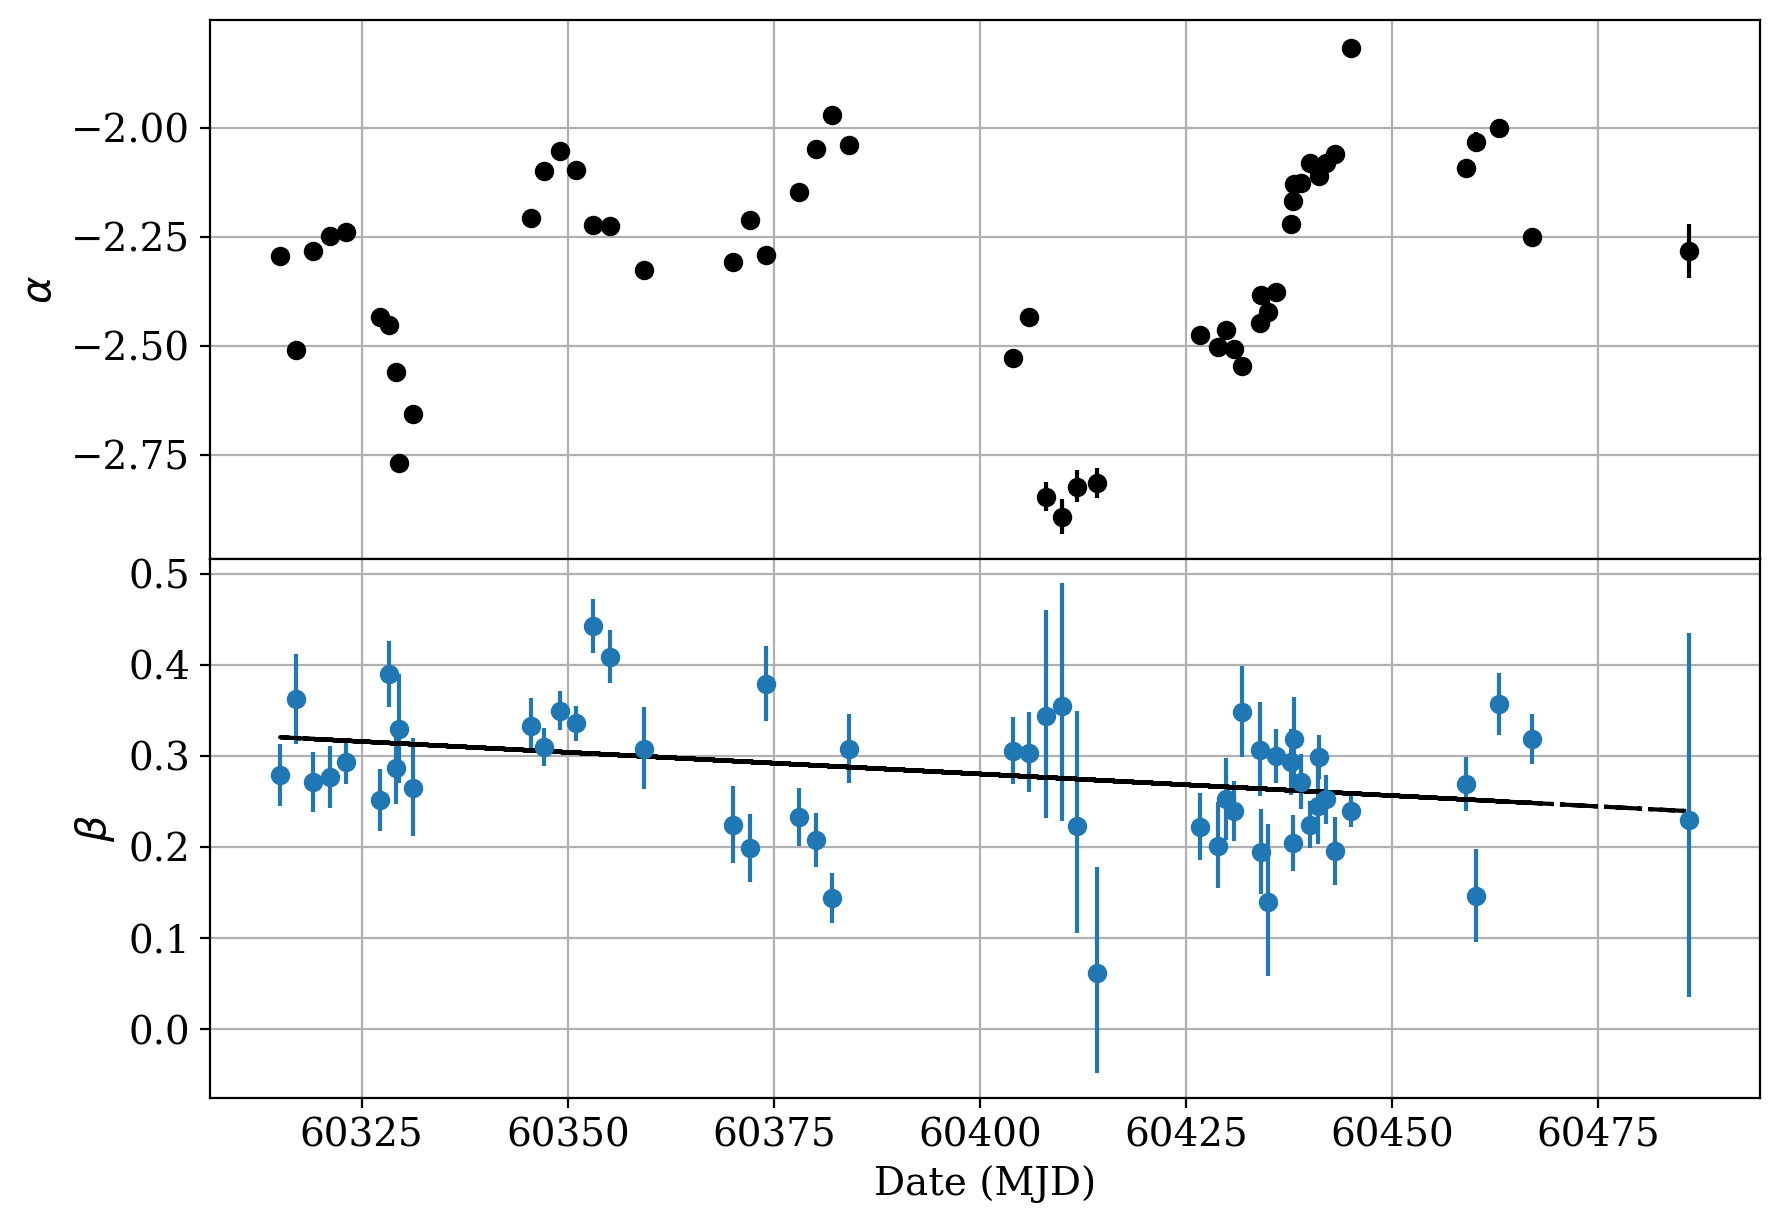

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(10,7), sharex = True)
fig.subplots_adjust(hspace=0.0)
axs[0].errorbar(xrt_mjd_ls2kev, -1*xrt_alpha_ls2kev, yerr = [(xrt_lowalpha_ls2kev_err), (xrt_highalpha_ls2kev_err)], color= 'black', fmt='o', label = 'alpha')
#axs[0].plot(xrt_mjd_ls2kev, model_xrt_alpha, color='brown', ls='--', lw=2)
#axs[0].set_xlabel(r'MJD')
axs[0].set_ylabel(r'$\alpha$', fontsize=15)
axs[0].grid(True)
#axs[0].set_xlim(60425, 60446)
#axs[0].set_title('alpha values for SWIFT-XRT data')
axs[1].errorbar(xrt_mjd_ls2kev, xrt_beta_ls2kev, [(xrt_lowbeta_ls2kev_err), (xrt_highbeta_ls2kev_err)], fmt='o', label = 'beta')
#axs[1].plot(xrt_mjd_ls2kev, model_xrt, color='brown', ls='--', lw=2)
#axs[1].axhline(np.mean(xrt_beta_ls2kev))
axs[1].plot(xrt_mjd_ls2kev, lin_func(xrt_mjd_ls2kev_shifted, *param_xrt), ls='-.', color = 'black')
axs[1].set_ylabel(r'$\beta$', fontsize=15)
axs[1].grid(True)
axs[1].set_xlabel('Date (MJD)')
#axs[1].set_xlim(60425, 60446)
#plt.title('beta values for SWIFT-XRT data')
#plt.tight_layout()
plt.show()

In [112]:
xrt_mjd_ls2kev_fbeta_select = np.where((xrt_mjd_ls2kev_fbeta >= 60425) & (xrt_mjd_ls2kev_fbeta <= 60450))

xrt_mjd_ls2kev_fbeta_selected = xrt_mjd_ls2kev_fbeta[xrt_mjd_ls2kev_fbeta_select]

xrt_alpha_ls2kev_fbeta_selected = xrt_alpha_ls2kev_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_alpha_gs2kev_fbeta_selected = xrt_alpha_gs2kev_fbeta[xrt_mjd_ls2kev_fbeta_select]

xrt_highalpha_ls2kev_err_fbeta_selected = xrt_highalpha_ls2kev_err_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_highalpha_gs2kev_err_fbeta_selected = xrt_highalpha_gs2kev_err_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_lowalpha_ls2kev_err_fbeta_selected = xrt_lowalpha_ls2kev_err_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_lowalpha_gs2kev_err_fbeta_selected = xrt_lowalpha_gs2kev_err_fbeta[xrt_mjd_ls2kev_fbeta_select]
###########################################

xrt_f_ls2kev_fbeta_selected = xrt_f_ls2kev_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_f_gs2kev_fbeta_selected = xrt_f_gs2kev_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_eflow_ls2kev_fbeta_selected = xrt_eflow_ls_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_eflow_gs2kev_fbeta_selected = xrt_eflow_gs_fbeta[xrt_mjd_ls2kev_fbeta_select]

xrt_efhigh_ls2kev_fbeta_selected = xrt_efhigh_ls_fbeta[xrt_mjd_ls2kev_fbeta_select]
xrt_efhigh_gs2kev_fbeta_selected = xrt_efhigh_gs_fbeta[xrt_mjd_ls2kev_fbeta_select]

In [113]:
xrt_mjd_ls2kev_fbeta_shifted = xrt_mjd_ls2kev_fbeta_selected - np.min(xrt_mjd_ls2kev_fbeta_selected)

param_xrt_alpha1, pcov_xrt_alpha1 = curve_fit(lin_func, xrt_mjd_ls2kev_fbeta_shifted, xrt_alpha_ls2kev_fbeta_selected, sigma= xrt_highalpha_ls2kev_err_fbeta_selected, absolute_sigma=True)
param_xrt_alpha2, pcov_xrt_alpha2 = curve_fit(lin_func, xrt_mjd_ls2kev_fbeta_shifted, xrt_alpha_gs2kev_fbeta_selected, sigma= xrt_highalpha_gs2kev_err_fbeta_selected, absolute_sigma=True)

In [114]:
print(param_xrt_alpha1[0])
print(np.sqrt(np.diag(pcov_xrt_alpha1)))

-0.04155154400613828
[0.00051482 0.0065616 ]


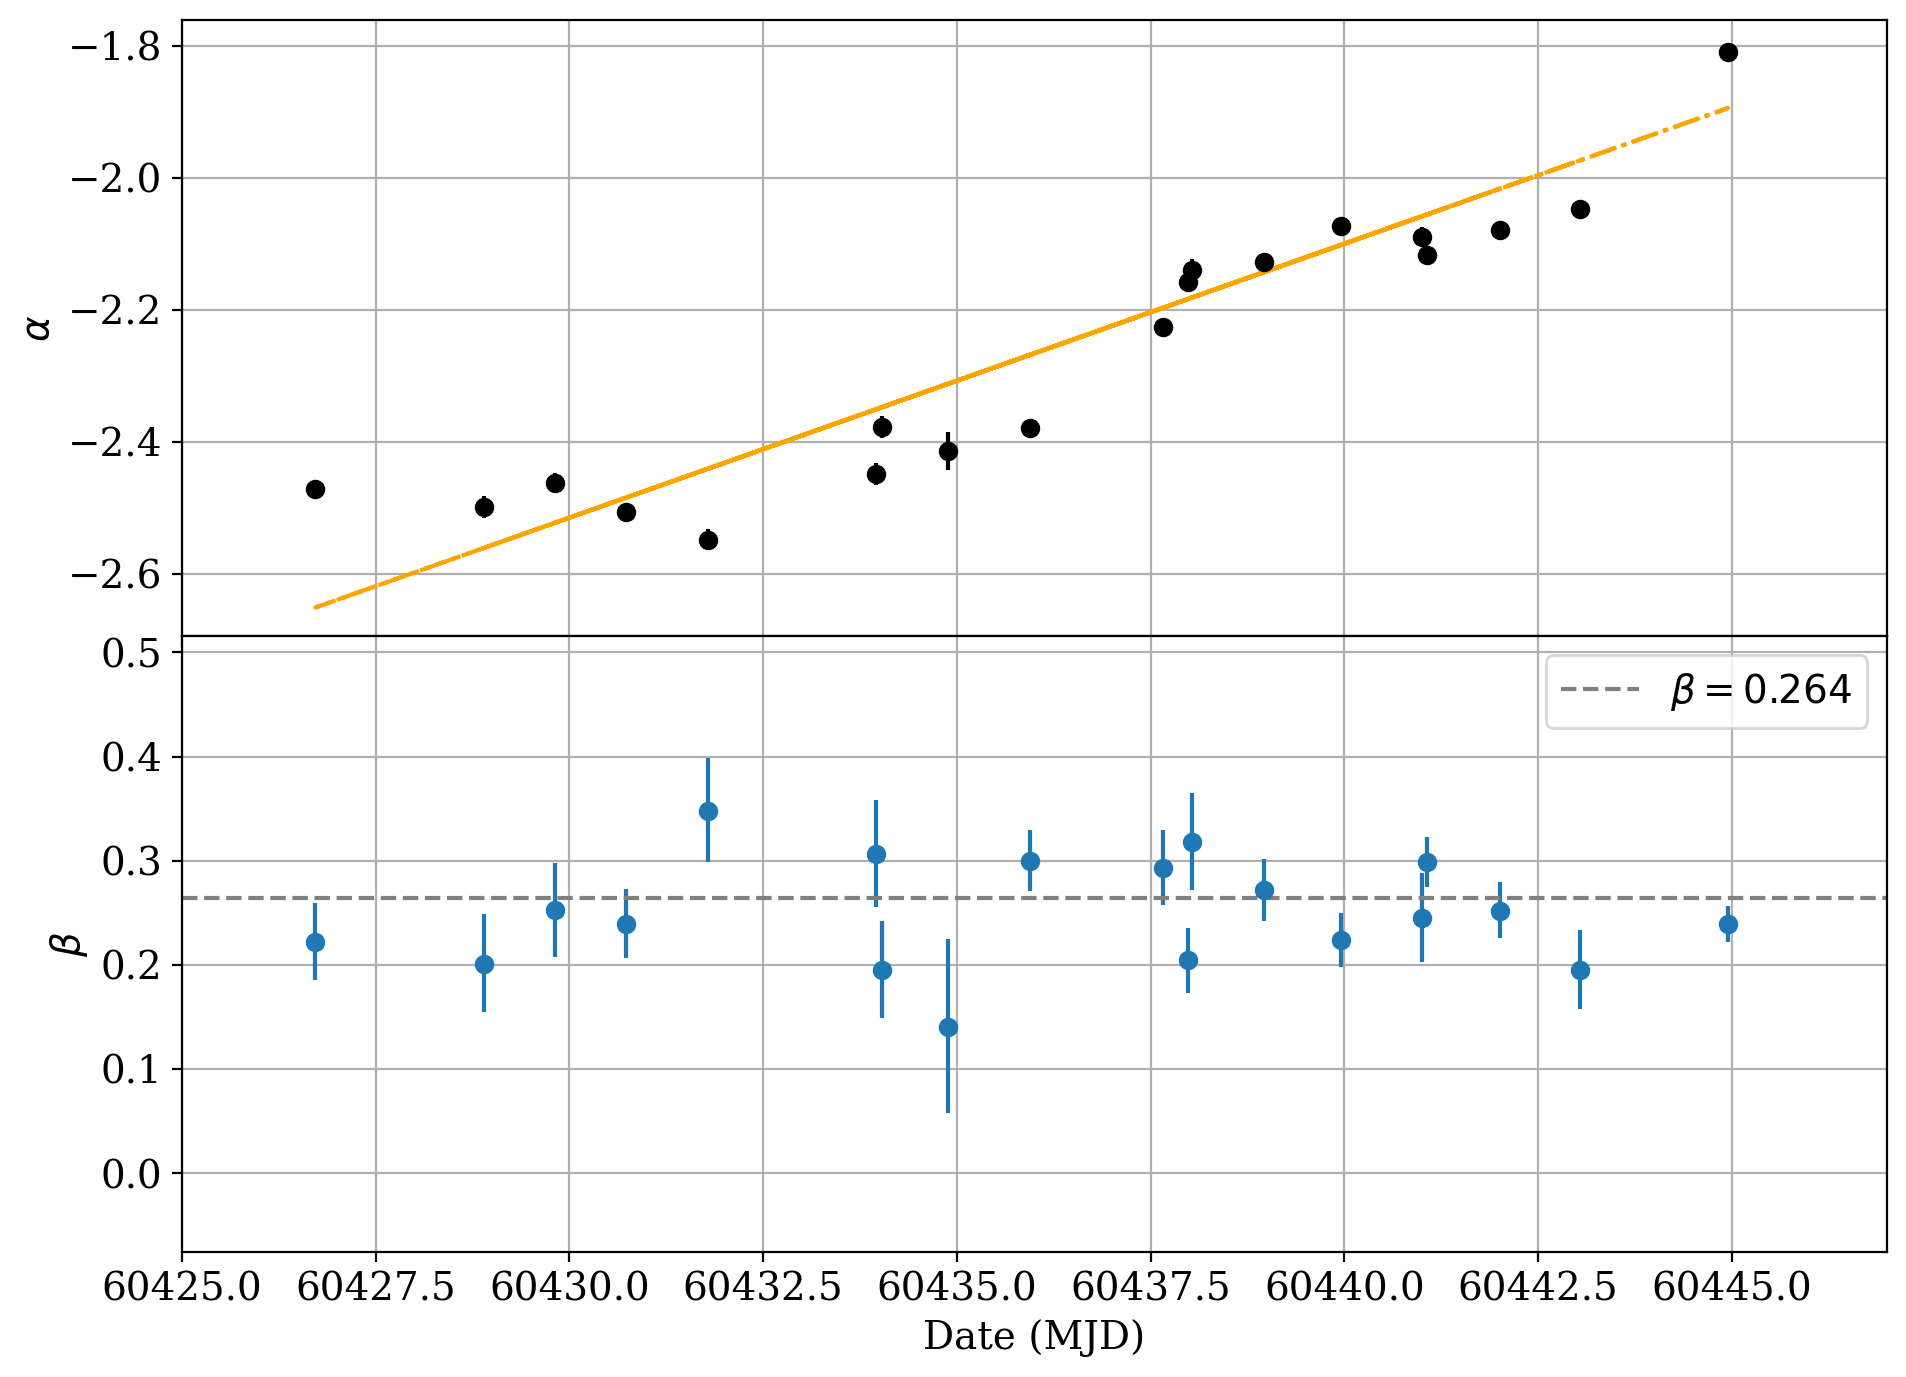

In [115]:
fig, axs = plt.subplots(2, 1, figsize=(11,8), sharex = True)
fig.subplots_adjust(hspace=0.0)
axs[1].errorbar(xrt_mjd_ls2kev, xrt_beta_ls2kev, yerr=[xrt_lowbeta_gs2kev_err, xrt_highbeta_gs2kev_err], fmt='o', )
axs[1].axhline(y = 0.263878, color = 'grey', linestyle='--', label = r'$\beta = 0.264$')
axs[1].set_xlim(60425, 60447)
axs[1].set_ylabel(r'$\beta$')
axs[1].set_xlabel(r'Date (MJD)')
axs[1].legend(loc='upper right')
axs[1].grid(True)
axs[0].errorbar(xrt_mjd_ls2kev_fbeta_selected, -1*xrt_alpha_ls2kev_fbeta_selected, yerr=[xrt_lowalpha_gs2kev_err_fbeta_selected, xrt_highalpha_gs2kev_err_fbeta_selected], fmt='o', color = 'black')
axs[0].plot(xrt_mjd_ls2kev_fbeta_selected, -1*lin_func(xrt_mjd_ls2kev_fbeta_shifted, *param_xrt_alpha1), linestyle = '-.', color = 'orange')
axs[0].set_ylabel(r'$\alpha$')
axs[0].set_xlim(60425, 60447)
axs[0].grid(True)
plt.savefig('xray_alpha_beta.png')

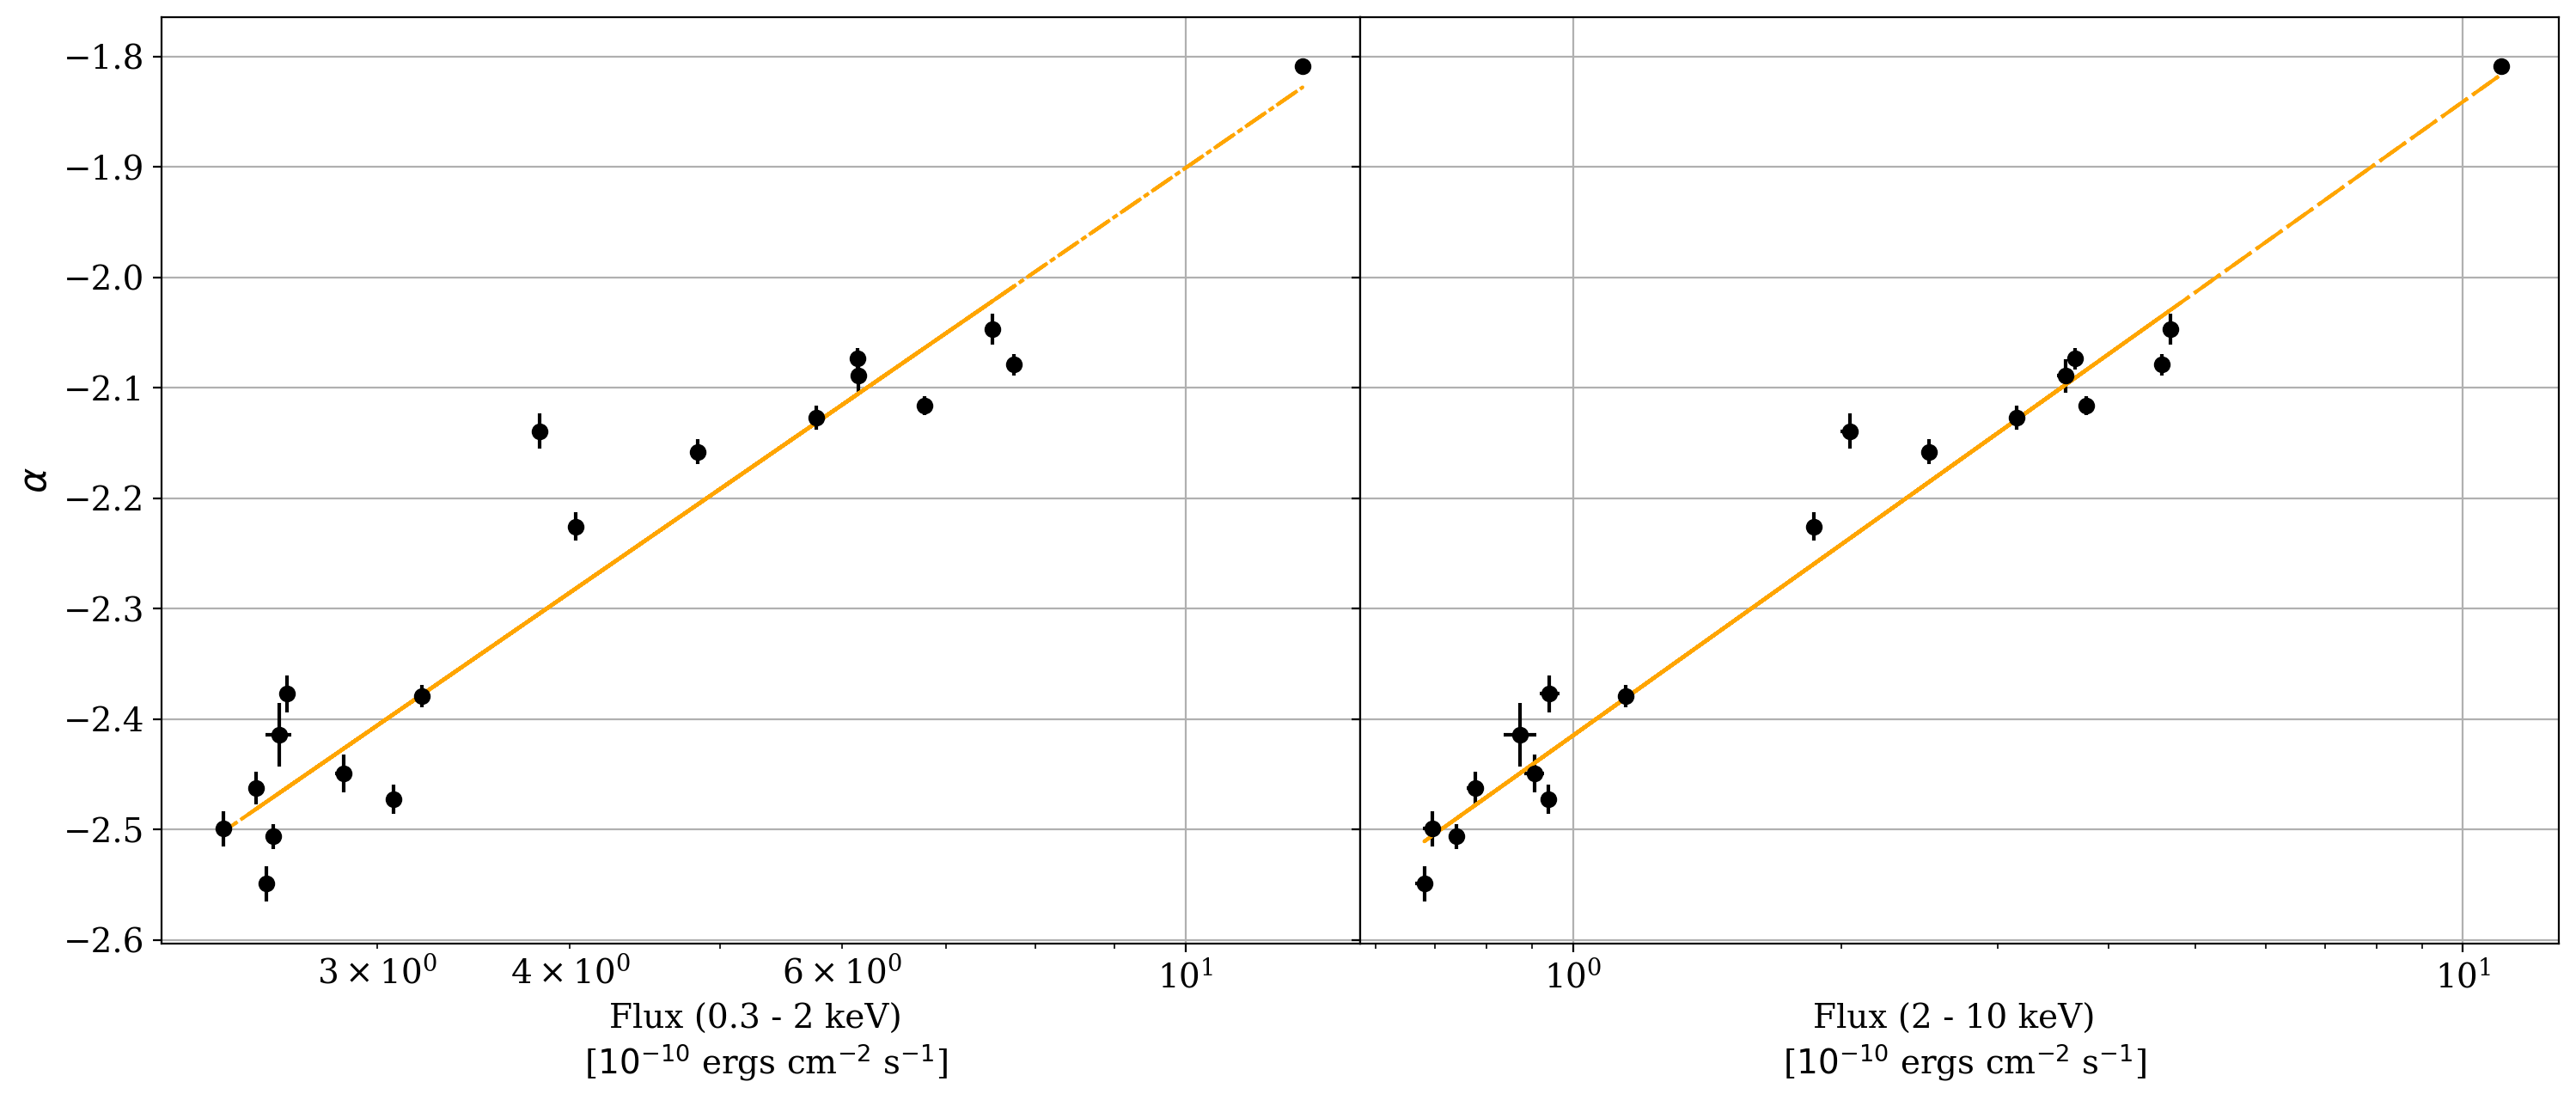

In [127]:
param_alpha1, pcov_alpha1 = curve_fit(lin_func, xrt_f_ls2kev_fbeta_selected, xrt_alpha_ls2kev_fbeta_selected, sigma= xrt_highalpha_ls2kev_err_fbeta_selected, absolute_sigma=True)
param_alpha2, pcov_alpha2 = curve_fit(lin_func, xrt_f_gs2kev_fbeta_selected, xrt_alpha_gs2kev_fbeta_selected, sigma= xrt_highalpha_gs2kev_err_fbeta_selected, absolute_sigma=True)
fig, axs = plt.subplots(1, 2, figsize=(18,7), sharey = True)
fig.subplots_adjust(wspace=0.0)
axs[0].errorbar(10**(xrt_f_ls2kev_fbeta_selected)/10e-11, -1*xrt_alpha_ls2kev_fbeta_selected, yerr=[xrt_lowalpha_ls2kev_err_fbeta_selected, xrt_highalpha_ls2kev_err_fbeta_selected], xerr = [(xrt_eflow_ls2kev_fbeta_selected)/10e-11, (xrt_efhigh_ls2kev_fbeta_selected)/10e-11], color='black', fmt='o')
axs[0].plot(10**(xrt_f_ls2kev_fbeta_selected)/10e-11, -1*lin_func(xrt_f_ls2kev_fbeta_selected, *param_alpha1), color= 'orange', linestyle='-.')
axs[0].set_xscale('log')
axs[0].set_ylabel(r'$\alpha$', fontsize=16)
axs[0].set_xlabel('Flux (0.3 - 2 keV) \n [$10^{-10}$ ergs cm$^{-2}$ s$^{-1}$]')
axs[0].grid(True)
axs[1].errorbar(10**(xrt_f_gs2kev_fbeta_selected)/10e-11, -1*xrt_alpha_gs2kev_fbeta_selected, yerr=[xrt_lowalpha_gs2kev_err_fbeta_selected, xrt_highalpha_gs2kev_err_fbeta_selected], xerr = [(xrt_eflow_gs2kev_fbeta_selected)/10e-11, (xrt_efhigh_gs2kev_fbeta_selected)/10e-11], color='black', fmt='o')
axs[1].plot(10**(xrt_f_gs2kev_fbeta_selected)/10e-11, -1*lin_func(xrt_f_gs2kev_fbeta_selected, *param_alpha2), color= 'orange', linestyle='-.')
#axs[1].plot(xrt_mjd_ls2kev_fbeta_selected, lin_func(xrt_mjd_ls2kev_fbeta_shifted, *param_xrt_alpha1))
#axs[1].set_xlim(60425, 60447)
axs[1].set_xscale('log')
axs[1].set_xlabel('Flux (2 - 10 keV) \n [$10^{-10}$ ergs cm$^{-2}$ s$^{-1}$]')
axs[1].grid(True)
plt.savefig('xrayflux_alpha_rel.png')